








































































































Bibliotecas utilizadas


In [ ]:
import bigframes as bf
import bigframes.pandas as bpd

In [ ]:
bf.options.bigquery.project = "cdle-415809"
bf.options.bigquery.location = "us-central1"

# Visualização de bibliotecas e procura de colunas importantes

In [ ]:
df = bpd.read_gbq("cdle-415809.CDLE.Projeto1")
df

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,89665332,10724,164826,231067,3652,2185-06-10 15:30:00,2185-06-10 16:15:00,16660,98,98,Deg F,<NA>,<NA>,<NA>,NotStopd
1,271155005,40548,168670,260223,223901,2156-08-09 08:00:00,2156-08-09 12:43:00,19463,Obeys Commands,6,<NA>,0,0,<NA>,<NA>
2,85506333,9960,159243,200036,550,2181-08-29 03:00:00,2181-08-29 04:02:00,18592,Universal,<NA>,<NA>,<NA>,<NA>,<NA>,NotStopd
3,183524860,30310,121631,282905,171,2108-11-16 17:00:00,2108-11-16 19:45:00,15630,Cough/DeepBreath,<NA>,<NA>,<NA>,<NA>,<NA>,NotStopd
4,74709283,7731,125193,287285,32,2178-02-28 01:00:00,2178-02-28 03:25:00,21570,Tolerated Well,<NA>,<NA>,<NA>,<NA>,<NA>,NotStopd
5,161747143,25368,146404,233582,618,2128-09-17 17:00:00,2128-09-17 17:02:00,15283,24,24,BPM,<NA>,<NA>,<NA>,NotStopd
6,224304991,31044,184171,204730,5820,2121-05-04 19:00:00,2121-05-04 19:11:00,16302,90,90,%,<NA>,<NA>,<NA>,NotStopd
7,24361814,78532,177956,240761,224150,2159-05-08 03:00:00,2159-05-08 06:45:00,17574,176,176,mmHg,0,0,<NA>,<NA>
8,54287556,3868,157650,269518,211,2125-09-13 07:00:00,2125-09-13 07:30:00,17189,87,87,BPM,<NA>,<NA>,<NA>,NotStopd
9,135859715,19942,190227,213176,683,2164-07-27 12:00:00,2164-07-27 12:04:00,18795,500,500,ml/B,<NA>,<NA>,<NA>,NotStopd


Ao visualizar a tabela dos CHARTEVENTS deparamo-nos com colunas que têm ligação a outras tabelas, logo incluimos essas colunas na nossa tabela de dados importantes chamada Data. Para além dessas colunas acrescentamos a coluna VALUE que contem informações sobre o valor medido com o item do ITEMID

In [ ]:
query = """

CREATE OR REPLACE TABLE cdle-415809.CDLE.Data AS
SELECT
  SUBJECT_ID,HADM_ID, ICUSTAY_ID, ITEMID, VALUE
FROM
  cdle-415809.CDLE.Projeto1

"""
df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE
0,234,188399,252814,787,26
1,250,124271,205951,861,16.8
2,31917,154591,238303,224828,3
3,31917,154591,238303,224828,3
4,31917,154591,238303,224828,3
5,31917,154591,238303,224828,3
6,32170,168196,270044,466,C Surg RN
7,32170,168196,270044,466,C Surg RN
8,32170,168196,270044,466,C Surg RN
9,32170,168196,270044,466,C Surg RN


Antes de prosseguir para outras tabelas limpamos os valores nulos da tabela data

In [ ]:
query ="""DELETE FROM cdle-415809.CDLE.Data
WHERE SUBJECT_ID IS NULL OR ICUSTAY_ID IS NULL or ITEMID IS NULL OR VALUE IS NULL"""

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE
0,234,188399,252814,787,26
1,250,124271,205951,861,16.8
2,31917,154591,238303,224828,3
3,31917,154591,238303,224828,3
4,31917,154591,238303,224828,3
5,31917,154591,238303,224828,3
6,32170,168196,270044,466,C Surg RN
7,32170,168196,270044,466,C Surg RN
8,32170,168196,270044,466,C Surg RN
9,32170,168196,270044,466,C Surg RN


Após a limpeza procuramos colunas importantes na tabela dos D_ITEMS

In [ ]:
query="""
SELECT
  *
FROM
  cdle-415809.CDLE.Itens

"""

df = bpd.read_gbq(query,use_cache=False)

df

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
0,14366,225929,ProBalance (Full),ProBalance (Full),metavision,inputevents_mv,Nutrition - Enteral,mL,Solution,<NA>
1,4881,8418,Inc #3 [Appearance],<NA>,carevue,chartevents,<NA>,<NA>,<NA>,<NA>
2,13689,225312,ART BP mean,ART BP mean,metavision,chartevents,Routine Vital Signs,mmHg,Numeric,<NA>
3,10152,45902,SSC30NG,<NA>,carevue,inputevents_cv,Free Form Intake,<NA>,<NA>,<NA>
4,15060,227962,Restraints (Violent),Restraints (Violent),metavision,chartevents,Restraint/Support Systems,<NA>,Text,<NA>
5,4451,6952,Aprotinen,<NA>,carevue,chartevents,<NA>,<NA>,<NA>,<NA>
6,2634,6238,propofol,<NA>,carevue,chartevents,<NA>,<NA>,<NA>,<NA>
7,9349,46169,free water bolus.,<NA>,carevue,inputevents_cv,Free Form Intake,<NA>,<NA>,<NA>
8,4555,7209,COUGH/DEEP BREATHING,<NA>,carevue,chartevents,<NA>,<NA>,<NA>,<NA>
9,12950,221212,"Saline 0,18%","Saline 0,18%",metavision,inputevents_mv,Fluids - Other (Not In Use),mL,Solution,<NA>


De todas as tabelas as que consideramos mais importantes foram as de Label e Category uma vez que indicam de uma forma mais detalhada o tipo de Item que estamos a utilizar. Com isto na tabela Data criamos duas colunas novas para receberem os dados novos

In [ ]:
query="""

ALTER TABLE cdle-415809.CDLE.Data ADD COLUMN ITEM_LABEL STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Data ADD COLUMN CATEGORY STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query ="""

UPDATE cdle-415809.CDLE.Data AS t1
SET t1.Category = t2.CATEGORY,
t1.Item_label = t2.LABEL
FROM cdle-415809.CDLE.Itens AS t2
WHERE t1.ITEMID = CAST(t2.ITEMID AS STRING)

"""
df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY
0,30112,159590,257809,220546,9.4,WBC,Labs
1,92405,166823,268822,220045,71,Heart Rate,Routine Vital Signs
2,17526,193493,253399,813,25.799999237060547,Hematocrit,Hematology
3,26012,104482,265571,1126,7.38,Art.pH,ABG
4,91217,179553,227042,220179,155,Non Invasive Blood Pressure systolic,Routine Vital Signs
5,91217,179553,227042,220179,155,Non Invasive Blood Pressure systolic,Routine Vital Signs
6,3283,161444,231755,704,Side to Side,Turn,<NA>
7,3283,161444,231755,704,Side to Side,Turn,<NA>
8,3283,161444,231755,704,Side to Side,Turn,<NA>
9,3283,161444,231755,704,Side to Side,Turn,<NA>


Como existe uma outra tabela de Items, mais especificamente relacionada com items de laboratorio resolvemos explorá-la também.

In [ ]:
query="""
SELECT
  *
FROM
  cdle-415809.CDLE.LabItens

"""

df = bpd.read_gbq(query,use_cache=False)

df

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,641,51441,Bands,Pleural,Hematology,<NA>
1,20,50819,PEEP,Blood,Blood Gas,20077-4
2,22,50821,pO2,Blood,Blood Gas,11556-8
3,403,51203,Factor IX,Blood,Hematology,3188-0
4,279,51079,"Cocaine, Urine",Urine,Chemistry,3397-7
5,542,51342,Wright Giemsa,Bone Marrow,Hematology,10355-6
6,386,51186,CD5 Absolute Count,Blood,Hematology,<NA>
7,634,51434,Other Cell,Other Body Fluid,Hematology,<NA>
8,516,51316,CD22,Bone Marrow,Hematology,<NA>
9,338,51138,Anticardiolipin Antibody IgG,Blood,Hematology,8065-5


Antes de fazer a correspondência dos dados resolvemos verificar se existe algum valor que provoque essa correspondência

In [ ]:
query="""
SELECT
    COUNT(*) AS total_ocorrencias
FROM
    cdle-415809.CDLE.LabItens AS t1
JOIN
    cdle-415809.CDLE.Data AS t2
ON
    cast(t1.ITEMID as STRING) = t2.ITEMID
"""

df = bpd.read_gbq(query,use_cache=False)

df

,total_ocorrencias
0,0


Como foi possivel ver não existem itens de laboratório associado por isso ignoramos por completo esta tabela. Passando então para a tabela da ICUSTAYS

In [ ]:
query="""

SELECT *
FROM cdle-415809.CDLE.ICUSTAYS

"""

df = bpd.read_gbq(query,use_cache=False)
df

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,11127,8744,175078,230090,carevue,NICU,NICU,56,56,2137-01-22 22:20:47+00:00,2137-01-23 00:57:15+00:00,0.1087
1,5359,4223,122294,227863,carevue,MICU,MICU,52,52,2152-04-07 20:05:14+00:00,2152-04-09 18:04:39+00:00,1.9163
2,59268,93362,187375,234826,metavision,CSRU,CSRU,12,12,2134-01-18 10:56:44+00:00,2134-01-19 15:48:39+00:00,1.2027
3,5045,3977,111024,203161,carevue,MICU,MICU,15,15,2141-05-04 18:55:56+00:00,2141-05-06 17:33:04+00:00,1.9425
4,9239,7255,180181,293531,carevue,CCU,CCU,57,57,2173-06-21 14:21:11+00:00,2173-06-25 19:00:47+00:00,4.1942
5,23434,18490,166658,211034,carevue,MICU,MICU,50,50,2105-07-23 03:50:56+00:00,2105-07-24 15:02:32+00:00,1.4664
6,46837,56116,131774,254007,metavision,TSICU,TSICU,14,14,2121-01-22 14:29:09+00:00,2121-01-23 18:01:45+00:00,1.1476
7,53805,76736,113085,212477,metavision,MICU,MICU,52,52,2168-03-26 03:04:39+00:00,2168-03-26 19:43:53+00:00,0.6939
8,3703,2948,158914,263205,carevue,MICU,MICU,12,12,2129-11-12 00:21:25+00:00,2129-11-14 18:06:28+00:00,2.7396
9,36184,28557,178081,296366,carevue,CSRU,CSRU,15,12,2129-05-18 11:22:43+00:00,2129-05-19 10:51:58+00:00,0.9786


In [ ]:
query="""

SELECT
    SUBJECT_ID,
    HADM_ID,
    ICUSTAY_ID,
    COUNT(*) as count
FROM
    cdle-415809.CDLE.ICUSTAYS
GROUP BY
    SUBJECT_ID,
    HADM_ID,
    ICUSTAY_ID



"""

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,count
0,66483,178107,234528,1
1,29665,175645,226839,1
2,52598,197463,217274,1
3,81560,180763,205872,1
4,83641,111403,216446,1
5,78729,198023,230604,1
6,56635,155645,206958,1
7,24563,148292,227419,1
8,42271,135534,212269,1
9,90720,151648,219723,1


Com a análise da tabela é possivel verificar que as colunas importantes seriam as INTIME, OUTTIME, LOS, uma vez que a SUBJECT_ID, ICUSTAYS_ID são únicas. No entanto, ao visualizar a explicação de cada coluna reparamos que a coluna LOS é a diferença de tempo em frações de dias entre o INTIME e OUTTIME, ficando assim com o LOS = Length of Stay. Com isto apenas utilizamos essa coluna.

In [ ]:
query="""
ALTER TABLE `cdle-415809.CDLE.Data` ADD COLUMN LOS FLOAT64
"""
df = bpd.read_gbq(query,use_cache=False)

query ="""

UPDATE cdle-415809.CDLE.Data AS t1
SET t1.LOS = t2.LOS
FROM cdle-415809.CDLE.ICUSTAYS AS t2
WHERE t1.ICUSTAY_ID = CAST(t2.ICUSTAY_ID AS STRING) and t1.SUBJECT_ID = CAST(t2.SUBJECT_ID AS STRING) and t1.HADM_ID = CAST(t2.HADM_ID AS STRING)

"""
df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS
0,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
1,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
2,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
3,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
4,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
5,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
6,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
7,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
8,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
9,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473


A correspondência podia ser feita usando apenas o ICUSTAY_ID, mas utilizamos os 3 indicadores de forma a ter a certeza da correspondência correta. Com isto fica terminada a primeira extração das colunas importantes.

# Visualização dos dados criados

In [ ]:
query ="""

select * from cdle-415809.CDLE.Data

"""
df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS
0,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
1,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
2,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
3,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
4,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
5,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
6,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
7,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
8,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
9,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473


Estes dados isolados não chegam para se prever corretamente os tempos de estadia, uma vez que tirando os indicadores únicos a cada paciente/item só temos equipamentos usados e tempo de estadia.

Resolvemos então criar uma nova tabela com os diagnósticos de cada paciente, mantendo uma ligação com a coluna criada anteriormente

Para esta fase 2 tabelas são importantes, a D_ICD_DIAGNOSES com os nomes dos diagnósticos e a DIAGNOSES_ICD responsável pela ligação do paciente ao nome do diagnóstico.

In [ ]:
df = bpd.read_gbq("cdle-415809.CDLE.Diagnoses")
df

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,3968,36253,Cystoid macular degen,Cystoid macular degeneration
1,7447,82390,Fx tibia NOS-open,Open fracture of unspecified part of tibia alone
2,8447,71292,Cryst arthrop NOS-up/arm,"Unspecified crystal arthropathy, upper arm"
3,11765,8700,Lac eyelid skn/perioculr,Laceration of skin of eyelid and periocular area
4,10292,81200,Fx up end humerus NOS-cl,Closed fracture of unspecified part of upper e...
5,12364,99709,Surg comp nerv systm NEC,Other nervous system complications
6,10199,V4983,Await organ transplnt st,Awaiting organ transplant status
7,169,01161,TB pneumonia-no exam,"Tuberculous pneumonia [any form], bacteriologi..."
8,5750,6254,Premenstrual tension,Premenstrual tension syndromes
9,6137,53989,Ot comp ot bariatrc proc,Other complications of other bariatric procedure


In [ ]:
df = bpd.read_gbq("cdle-415809.CDLE.coddiagnos")
df

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,row_num
0,565234,80880,143855,3,6040,1
1,191817,17197,143824,1,80022,1
2,319791,28222,118843,1,42823,1
3,380600,40347,124573,29,E8889,1
4,285723,25512,102762,6,77081,1
5,629796,95372,166743,9,49390,1
6,459850,57572,141317,35,04186,1
7,62032,5544,116545,28,45182,1
8,138553,12286,139519,3,V502,1
9,220632,19787,144745,3,3480,1


In [ ]:
query = """
SELECT SUBJECT_ID, HADM_ID, ICD9_CODE,SEQ_NUM, COUNT(*) AS count
FROM cdle-415809.CDLE.coddiagnos
GROUP BY HADM_ID, ICD9_CODE,SUBJECT_ID,SEQ_NUM
HAVING COUNT(*) > 1
ORDER BY count DESC
"""


df = bpd.read_gbq(query, use_cache=False)
df

,SUBJECT_ID,HADM_ID,ICD9_CODE,SEQ_NUM,count


É possivel verificar que não existem dados repetidos.

In [ ]:
query="""
CREATE OR REPLACE TABLE cdle-415809.CDLE.patient_codes_diag
AS
SELECT SUBJECT_ID, HADM_ID, SEQ_NUM as SEQ_NUM_DIAG,ICD9_CODE as CODE_DIAG
FROM cdle-415809.CDLE.coddiagnos;
"""

df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,SEQ_NUM_DIAG,CODE_DIAG
0,776,102794,8,2859
1,32418,193289,1,V3000
2,26855,112153,4,51919
3,30754,164006,11,56210
4,80856,123598,3,34830
5,51874,151466,13,496
6,83603,124154,4,7103
7,29971,100021,2,99649
8,62946,191485,11,4019
9,25807,133844,3,76528


Após criada a tabela fazemos a ligação ao com a tabela D_ICD_DIAGNOSES para obtermos os nomes desses diagnósticos

In [ ]:
query="""

ALTER TABLE cdle-415809.CDLE.patient_codes_diag ADD COLUMN DIAG_NAME STRING
"""
df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,SEQ_NUM_DIAG,CODE_DIAG,DIAG_NAME
0,27694,185673,12,04100,<NA>
1,18182,119847,5,6201,<NA>
2,46880,182925,9,4280,<NA>
3,23409,140978,1,V3001,<NA>
4,54690,191976,6,4254,<NA>
5,63219,194579,1,41401,<NA>
6,10478,138728,15,3051,<NA>
7,13872,125082,1,V3000,<NA>
8,3002,185653,10,5119,<NA>
9,68389,165355,13,2724,<NA>


In [ ]:
query ="""

UPDATE cdle-415809.CDLE.patient_codes_diag AS t1
SET t1.DIAG_NAME = t2.SHORT_TITLE
FROM cdle-415809.CDLE.Diagnoses AS t2
WHERE t1.CODE_DIAG = t2.ICD9_CODE

"""
df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,SEQ_NUM_DIAG,CODE_DIAG,DIAG_NAME
0,31901,124470,4,53081,Esophageal reflux
1,17667,124466,14,5859,Chronic kidney dis NOS
2,30943,138180,8,E9342,Adv eff anticoagulants
3,10377,151426,11,41071,"Subendo infarct, initial"
4,19213,147367,7,5363,Gastroparesis
5,7118,129158,15,5859,Chronic kidney dis NOS
6,27450,152177,14,5738,Liver disorders NEC
7,19940,198694,1,99859,Other postop infection
8,8152,160458,9,5789,Gastrointest hemorr NOS
9,92873,134362,1,4414,Abdom aortic aneurysm


# Limpeza das tabelas criadas

Após termos criado as duas tabelas iremos fazer uma limpeza dos dados nulos das tabelas mais importantes para não haver problemas na altura de alimentar o modelo com dados

Da tabela Data verificamos se existiam nulos em todas as colunas exceto na das categorias uma vez que esta não apresenta um valor significativo apenas informa a categoria do item utilizado.

In [ ]:
query ="""select * FROM cdle-415809.CDLE.Data
WHERE SUBJECT_ID IS NULL OR ICUSTAY_ID IS NULL or ITEMID IS NULL OR VALUE IS NULL or HADM_ID IS NULL"""

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS


In [ ]:

query ="""select * FROM cdle-415809.CDLE.Data
WHERE ITEM_LABEL IS NULL"""

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS
0,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,<NA>,<NA>,<NA>


In [ ]:
query ="""select * FROM cdle-415809.CDLE.Data
WHERE  LOS IS NULL"""

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS
0,5246,119872,229922,456,67,NBP Mean,<NA>,<NA>
1,14219,102096,219572,51,86,Arterial BP [Systolic],<NA>,<NA>
2,18605,144751,264352,646,98,SpO2,<NA>,<NA>
3,11438,154602,227666,8388,Oral,GI Intub #1 [Site],<NA>,<NA>
4,11438,154602,227666,8388,Oral,GI Intub #1 [Site],<NA>,<NA>
5,11438,154602,227666,8388,Oral,GI Intub #1 [Site],<NA>,<NA>
6,11438,154602,227666,8388,Oral,GI Intub #1 [Site],<NA>,<NA>
7,11438,154602,227666,8388,Oral,GI Intub #1 [Site],<NA>,<NA>
8,11438,154602,227666,8388,Oral,GI Intub #1 [Site],<NA>,<NA>
9,11438,154602,227666,8388,Oral,GI Intub #1 [Site],<NA>,<NA>


Após a verificam dos nulos eliminamos todas as linhas que têm na nossa coluna target valores nulos, assim como os items cujo nome é desconhecido

In [ ]:
query ="""DELETE FROM cdle-415809.CDLE.Data
WHERE ITEM_LABEL IS NULL OR LOS IS NULL"""

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS
0,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
1,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
2,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
3,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
4,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
5,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
6,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
7,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
8,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473
9,55337,164768,257015,227969,Lines and tubes concealed,Safety Measures_U_1,Restraint/Support Systems,29.0473


Após a eliminação desses dados verificamos se foi bem feita

In [ ]:
query ="""select * FROM cdle-415809.CDLE.Data
WHERE ITEM_LABEL IS NULL OR LOS IS NULL"""

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS


Verificando que não existem mais dados nulos passamos para a outra tabela dos diagnósticos

In [ ]:

query ="""select * FROM cdle-415809.CDLE.patient_codes_diag
WHERE SUBJECT_ID IS NULL OR HADM_ID IS NULL OR SEQ_NUM_DIAG IS NULL OR CODE_DIAG IS NULL"""

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,SEQ_NUM_DIAG,CODE_DIAG,DIAG_NAME
0,7880,184025,<NA>,<NA>,<NA>
1,28700,104588,<NA>,<NA>,<NA>
2,4023,170307,<NA>,<NA>,<NA>
3,9035,188023,<NA>,<NA>,<NA>
4,19092,186323,<NA>,<NA>,<NA>
5,7544,116945,<NA>,<NA>,<NA>
6,3369,126808,<NA>,<NA>,<NA>
7,29096,182322,<NA>,<NA>,<NA>
8,4791,159800,<NA>,<NA>,<NA>
9,29175,152368,<NA>,<NA>,<NA>


In [ ]:
query ="""select * FROM cdle-415809.CDLE.patient_codes_diag
WHERE SUBJECT_ID IS NULL OR HADM_ID IS NULL OR SEQ_NUM_DIAG IS NULL OR CODE_DIAG IS NULL OR DIAG_NAME IS NULL """

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,SEQ_NUM_DIAG,CODE_DIAG,DIAG_NAME
0,30931,113566,5,7793,<NA>
1,7709,151800,17,3488,<NA>
2,63059,194465,8,2874,<NA>
3,55878,176165,9,7863,<NA>
4,9396,106469,7,6000,<NA>
5,21223,147729,5,2765,<NA>
6,7104,123775,5,V721,<NA>
7,32406,172002,3,9973,<NA>
8,27536,127047,3,9974,<NA>
9,26134,154883,1,3580,<NA>


Os dados que não apresentam código serão eliminados. Contudo surgiu a dúvida sobre a importancia dos dados que não têm nome. Uma vez que pretendemos separar os dados por tipo de doença, o nome torna-se um fator importante de visualização. Dito isto, optamos por eliminar os dados que não apresentem nome

In [ ]:
query ="""DELETE FROM cdle-415809.CDLE.patient_codes_diag
WHERE CODE_DIAG IS NULL OR DIAG_NAME IS NULL"""

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,SEQ_NUM_DIAG,CODE_DIAG,DIAG_NAME
0,31901,124470,4,53081,Esophageal reflux
1,17667,124466,14,5859,Chronic kidney dis NOS
2,30943,138180,8,E9342,Adv eff anticoagulants
3,10377,151426,11,41071,"Subendo infarct, initial"
4,19213,147367,7,5363,Gastroparesis
5,7118,129158,15,5859,Chronic kidney dis NOS
6,27450,152177,14,5738,Liver disorders NEC
7,19940,198694,1,99859,Other postop infection
8,8152,160458,9,5789,Gastrointest hemorr NOS
9,92873,134362,1,4414,Abdom aortic aneurysm


Após feita a eliminação verificamos se esta tinha sido bem feita

In [ ]:
query ="""select * FROM cdle-415809.CDLE.patient_codes_diag
WHERE SUBJECT_ID IS NULL OR HADM_ID IS NULL OR SEQ_NUM_DIAG IS NULL OR CODE_DIAG IS NULL OR DIAG_NAME IS NULL """

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,SEQ_NUM_DIAG,CODE_DIAG,DIAG_NAME


# Agrupar por tipos de Doenças

Uma vez que já temos os dados mais importantes e as tabelas limpas iremos agrupar os dados em tabelas diferentes mas por tipo de doenças.

Para isso vamos começar por verificar que tipos de doenças diferentes temos.


In [ ]:
query ="""select Distinct(DIAG_NAME) FROM cdle-415809.CDLE.patient_codes_diag
"""

df = bpd.read_gbq(query,use_cache=False)
df

,DIAG_NAME
0,Heredit hemorr telangiec
1,Benign hyp ht dis w/o hf
2,Opn skl fx NEC/cereb lac
3,Suprcondyl fx humerus-cl
4,Ca in situ skin trunk
5,Myoneural disorders NEC
6,Congenital ureterocele
7,Acc poison-plants NEC
8,Dislocat site NEC-open
9,Elb/forearm/wrst inj NOS


In [ ]:
query ="""select Distinct(CODE_DIAG) FROM cdle-415809.CDLE.patient_codes_diag
"""

df = bpd.read_gbq(query,use_cache=False)
df

,CODE_DIAG
0,36500
1,20502
2,40511
3,7776
4,5670
5,9212
6,5370
7,44771
8,3824
9,5819


In [ ]:
query="""
select * from cdle-415809.CDLE.Diagnoses

"""

df = bpd.read_gbq(query,use_cache=False)
df


,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,3968,36253,Cystoid macular degen,Cystoid macular degeneration
1,7447,82390,Fx tibia NOS-open,Open fracture of unspecified part of tibia alone
2,8447,71292,Cryst arthrop NOS-up/arm,"Unspecified crystal arthropathy, upper arm"
3,11765,8700,Lac eyelid skn/perioculr,Laceration of skin of eyelid and periocular area
4,10292,81200,Fx up end humerus NOS-cl,Closed fracture of unspecified part of upper e...
5,12364,99709,Surg comp nerv systm NEC,Other nervous system complications
6,10199,V4983,Await organ transplnt st,Awaiting organ transplant status
7,169,01161,TB pneumonia-no exam,"Tuberculous pneumonia [any form], bacteriologi..."
8,5750,6254,Premenstrual tension,Premenstrual tension syndromes
9,6137,53989,Ot comp ot bariatrc proc,Other complications of other bariatric procedure


Como verificamos que haviam várias doenças diferentes e muitos pacientes tinham mais que uma doença diagnosticada resolvemos tentar fazer um modelo apenas para uma das doenças, começando assim a verificar qual a doença tinha maior numero de pacientes.

In [ ]:
query="""
SELECT
  p.SUBJECT_ID,
  p.LOS,
  d.CODE_DIAG
FROM
  `cdle-415809.CDLE.Data` AS p
JOIN
  `cdle-415809.CDLE.patient_codes_diag` AS d
ON
  p.SUBJECT_ID = cast(d.SUBJECT_ID as STRING)
WHERE
  d.CODE_DIAG = '82390';

"""

df = bpd.read_gbq(query,use_cache=False)
df


,SUBJECT_ID,LOS,CODE_DIAG
0,13200,3.5184,82390
1,13200,3.5184,82390
2,13200,3.5184,82390
3,13200,3.5184,82390
4,13200,3.5184,82390
5,13200,3.5184,82390
6,13200,3.5184,82390
7,13200,3.5184,82390
8,13200,3.5184,82390
9,13200,3.5184,82390


In [ ]:
query="""

SELECT
  d.CODE_DIAG,
  COUNT(Distinct(p.SUBJECT_ID)) AS Num_Pacientes
FROM
  `cdle-415809.CDLE.Data` AS p
JOIN
  `cdle-415809.CDLE.patient_codes_diag` AS d
ON
  p.SUBJECT_ID = cast(d.SUBJECT_ID as STRING)
GROUP BY
  d.CODE_DIAG;

"""

df = bpd.read_gbq(query,use_cache=False)
df

,CODE_DIAG,Num_Pacientes
0,34982,622
1,6821,42
2,6214,2
3,E8508,9
4,90141,2
5,E9353,35
6,9170,2
7,9881,3
8,56781,20
9,8786,1


In [ ]:
query="""

SELECT
  d.CODE_DIAG,
  COUNT(Distinct(p.SUBJECT_ID)) AS Num_Pacientes
FROM
  `cdle-415809.CDLE.Data` AS p
JOIN
  `cdle-415809.CDLE.patient_codes_diag` AS d
ON
  p.SUBJECT_ID = cast(d.SUBJECT_ID as STRING)
GROUP BY
  d.CODE_DIAG
ORDER BY
  Num_Pacientes DESC
LIMIT 5;
"""

df = bpd.read_gbq(query,use_cache=False)
df

,CODE_DIAG,Num_Pacientes
0,5849,7683
1,41401,10765
2,42731,10260
3,4019,17587
4,4280,9834


In [ ]:
query="""
select * from cdle-415809.CDLE.Diagnoses
where ICD9_CODE="4019"

"""

df = bpd.read_gbq(query,use_cache=False)
df

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,4304,4019,Hypertension NOS,Unspecified essential hypertension


Ao visualizar os pacientes com cada tipo de diagnóstico decidimos escolher o diagnostico com maior numero de pacientes de forma a fazermos um modelo para prever melhor o tempo de espera.

# Outras variáveis importantes para prever o "Length of stay"

Com o decorrer da analise reparamos que existiam variáveis que poderiam ser importantes para prever o tempo de estadia, entre elas a idade, usando a data de nascimento, a sua etnia, o genero e o tipo de urgencia com que fez a admissão.

Para isso foi usada as tabelas Patients e Admissions

In [ ]:
query="""
select * from cdle-415809.CDLE.Admissions

"""
df = bpd.read_gbq(query,use_cache=False)
df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,13085,10699,131811,2185-05-31 10:20:00+00:00,2185-07-11 12:15:00+00:00,<NA>,NEWBORN,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Private,<NA>,CATHOLIC,<NA>,WHITE,<NA>,<NA>,NEWBORN,0,1
1,5542,4587,198345,2150-05-19 11:01:00+00:00,2150-05-21 15:01:00+00:00,2150-05-21 15:01:00+00:00,EMERGENCY,EMERGENCY ROOM ADMIT,DEAD/EXPIRED,Medicare,<NA>,CATHOLIC,MARRIED,WHITE,2150-05-19 03:19:00+00:00,2150-05-19 10:45:00+00:00,SEPSIS;HYPOXIA,1,1
2,28638,23467,101328,2169-08-02 17:08:00+00:00,2169-08-04 16:14:00+00:00,<NA>,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Private,<NA>,JEWISH,<NA>,WHITE,<NA>,<NA>,NEWBORN,0,1
3,27285,22362,148514,2117-01-21 12:54:00+00:00,2117-01-28 13:20:00+00:00,<NA>,NEWBORN,CLINIC REFERRAL/PREMATURE,SHORT TERM HOSPITAL,Medicaid,<NA>,PROTESTANT QUAKER,<NA>,WHITE,<NA>,<NA>,NEWBORN,0,1
4,51357,76116,170491,2164-10-08 12:36:00+00:00,2164-10-12 16:30:00+00:00,<NA>,EMERGENCY,CLINIC REFERRAL/PREMATURE,LONG TERM CARE HOSPITAL,Private,ENGL,PROTESTANT QUAKER,MARRIED,BLACK/AFRICAN AMERICAN,2164-10-08 08:40:00+00:00,2164-10-08 13:05:00+00:00,STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK,0,1
5,35700,29277,111703,2167-10-17 11:15:00+00:00,2167-10-19 13:15:00+00:00,<NA>,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,Government,ENGL,CHRISTIAN SCIENTIST,SINGLE,BLACK/AFRICAN AMERICAN,<NA>,<NA>,NEWBORN,0,1
6,25534,20925,133360,2139-04-02 07:15:00+00:00,2139-04-15 13:20:00+00:00,<NA>,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,<NA>,PROTESTANT QUAKER,MARRIED,WHITE,<NA>,<NA>,BLADDER CA/SDA,0,1
7,9568,7809,149867,2133-01-07 04:14:00+00:00,2133-01-11 16:58:00+00:00,<NA>,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicaid,ENGL,PROTESTANT QUAKER,DIVORCED,BLACK/AFRICAN AMERICAN,2133-01-06 23:22:00+00:00,2133-01-07 05:54:00+00:00,DIABETIC KETOACIDOSIS,0,1
8,7252,5921,128142,2159-01-01 01:51:00+00:00,2159-01-11 19:03:00+00:00,<NA>,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Medicaid,CAPE,<NA>,SINGLE,UNKNOWN/NOT SPECIFIED,2159-01-01 00:06:00+00:00,2159-01-01 02:30:00+00:00,S/P MOTOR VEHICLE ACCIDENT,0,1
9,36849,30253,170829,2150-08-20 12:02:00+00:00,2150-08-26 13:42:00+00:00,<NA>,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2150-08-20 09:08:00+00:00,2150-08-20 13:28:00+00:00,HYPOGLYCEMIA,0,1


In [ ]:
query="""
select * from cdle-415809.CDLE.Patients

"""
df = bpd.read_gbq(query,use_cache=False)
df

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,33252,49367,F,2092-03-30 00:00:00+00:00,<NA>,<NA>,<NA>,0
1,2642,2793,F,1887-04-13 00:00:00+00:00,2187-04-18 00:00:00+00:00,2187-04-18 00:00:00+00:00,2187-04-18 00:00:00+00:00,1
2,23066,24444,M,2104-09-05 00:00:00+00:00,2168-09-03 00:00:00+00:00,2168-09-03 00:00:00+00:00,2168-09-03 00:00:00+00:00,1
3,15423,16312,M,2118-09-24 00:00:00+00:00,<NA>,<NA>,<NA>,0
4,29140,31000,F,2099-01-04 00:00:00+00:00,2176-11-16 00:00:00+00:00,2176-11-16 00:00:00+00:00,2176-11-16 00:00:00+00:00,1
5,37722,66109,F,2103-12-15 00:00:00+00:00,<NA>,<NA>,<NA>,0
6,38364,68601,F,2118-11-23 00:00:00+00:00,<NA>,<NA>,<NA>,0
7,37341,64752,F,1862-06-23 00:00:00+00:00,<NA>,<NA>,<NA>,0
8,8597,9083,M,2153-10-30 00:00:00+00:00,<NA>,<NA>,<NA>,0
9,18105,19170,F,2145-03-18 00:00:00+00:00,<NA>,<NA>,<NA>,0


Os pacientes com datas de aniversario 300 anos antes significa que têm mais que 89 anos

In [ ]:
query="""

ALTER TABLE cdle-415809.CDLE.Data ADD COLUMN ADMISSION_TYPE STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Data ADD COLUMN ETHNICITY STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query ="""

UPDATE cdle-415809.CDLE.Data AS t1
SET t1.ADMISSION_TYPE = t2.ADMISSION_TYPE,
t1.ETHNICITY = t2.ETHNICITY
FROM cdle-415809.CDLE.Admissions AS t2
WHERE t1.SUBJECT_ID = CAST(t2.SUBJECT_ID AS STRING) and t1.HADM_ID = CAST(t2.HADM_ID AS STRING)

"""
df = bpd.read_gbq(query,use_cache=False)

df



,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS,ADMISSION_TYPE,ETHNICITY
0,58588,164898,248923,227346,Forgets limitations,Mental status,Restraint/Support Systems,8.3068,EMERGENCY,WHITE
1,58588,164898,248923,227346,Forgets limitations,Mental status,Restraint/Support Systems,8.3068,EMERGENCY,WHITE
2,58588,164898,248923,227346,Forgets limitations,Mental status,Restraint/Support Systems,8.3068,EMERGENCY,WHITE
3,58588,164898,248923,227346,Forgets limitations,Mental status,Restraint/Support Systems,8.3068,EMERGENCY,WHITE
4,58588,164898,248923,227346,Forgets limitations,Mental status,Restraint/Support Systems,8.3068,EMERGENCY,WHITE
5,58588,164898,248923,227346,Forgets limitations,Mental status,Restraint/Support Systems,8.3068,EMERGENCY,WHITE
6,58588,164898,248923,227346,Forgets limitations,Mental status,Restraint/Support Systems,8.3068,EMERGENCY,WHITE
7,58588,164898,248923,227346,Forgets limitations,Mental status,Restraint/Support Systems,8.3068,EMERGENCY,WHITE
8,58588,164898,248923,227346,Forgets limitations,Mental status,Restraint/Support Systems,8.3068,EMERGENCY,WHITE
9,58588,164898,248923,227346,Forgets limitations,Mental status,Restraint/Support Systems,8.3068,EMERGENCY,WHITE


In [ ]:
query="""

ALTER TABLE cdle-415809.CDLE.Data ADD COLUMN GENDER STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Data ADD COLUMN DOBs TIMESTAMP
"""
df = bpd.read_gbq(query,use_cache=False)

query ="""

UPDATE cdle-415809.CDLE.Data AS t1
SET t1.GENDER = t2.GENDER,
t1.DOBs = t2.DOB
FROM cdle-415809.CDLE.Patients AS t2
WHERE t1.SUBJECT_ID = CAST(t2.SUBJECT_ID AS STRING)

"""
df = bpd.read_gbq(query,use_cache=False)

df


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS,ADMISSION_TYPE,ETHNICITY,GENDER,DOBs
0,18822,177917,209986,456,55.333301544189453,NBP Mean,<NA>,21.0649,EMERGENCY,UNKNOWN/NOT SPECIFIED,M,2118-09-02 00:00:00+00:00
1,14485,156459,298737,550,Universal,Precautions,<NA>,23.8012,EMERGENCY,WHITE,M,2089-06-15 00:00:00+00:00
2,14485,156459,298737,550,Universal,Precautions,<NA>,23.8012,EMERGENCY,WHITE,M,2089-06-15 00:00:00+00:00
3,14485,156459,298737,550,Universal,Precautions,<NA>,23.8012,EMERGENCY,WHITE,M,2089-06-15 00:00:00+00:00
4,14485,156459,298737,550,Universal,Precautions,<NA>,23.8012,EMERGENCY,WHITE,M,2089-06-15 00:00:00+00:00
5,14485,156459,298737,550,Universal,Precautions,<NA>,23.8012,EMERGENCY,WHITE,M,2089-06-15 00:00:00+00:00
6,14485,156459,298737,550,Universal,Precautions,<NA>,23.8012,EMERGENCY,WHITE,M,2089-06-15 00:00:00+00:00
7,14485,156459,298737,550,Universal,Precautions,<NA>,23.8012,EMERGENCY,WHITE,M,2089-06-15 00:00:00+00:00
8,14485,156459,298737,550,Universal,Precautions,<NA>,23.8012,EMERGENCY,WHITE,M,2089-06-15 00:00:00+00:00
9,14485,156459,298737,550,Universal,Precautions,<NA>,23.8012,EMERGENCY,WHITE,M,2089-06-15 00:00:00+00:00


# Preparação dos dados para o modelo

A nossa primeira tentativa era fazer um modelo de previsão para apenas uma doença, no entanto, ao tentarmos fazer a agrupação dos dados esta não estava a ser feita corretamente uma vez que, como foi dito anteriormente, cada paciente tinha mais que um diagnóstico associado, tinha também vários itens e procedimentos associados.

Com isto a nossa ideia seria não fazer um modelo apenas para uma doença mas para todas, assim como os procedimentos e itens.

In [ ]:
query="""

SELECT
  a.SUBJECT_ID,
  a.HADM_ID,
  a.ADMITTIME,
  a.DISCHTIME,
  STRING_AGG(DISTINCT cast(d.ICD9_CODE as STRING), ',') AS DIAGNOSES
FROM
  `cdle-415809.CDLE.Admissions` AS a
JOIN
  `cdle-415809.CDLE.coddiagnos` AS d
ON
  a.HADM_ID = d.HADM_ID
GROUP BY
  a.SUBJECT_ID, a.HADM_ID, a.ADMITTIME, a.DISCHTIME;

WITH Diagnoses AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    a.ADMITTIME,
    a.DISCHTIME,
    STRING_AGG(DISTINCT cast(d.ICD9_CODE as STRING), ',') AS DIAGNOSES
  FROM
    `cdle-415809.CDLE.Admissions` AS a
  JOIN
    `cdle-415809.CDLE.coddiagnos` AS d
  ON
    a.HADM_ID = d.HADM_ID
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID, a.ADMITTIME, a.DISCHTIME
),
Procedures AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT cast(p.ICD9_CODE as STRING), ',') AS PROCEDURES
  FROM
    `cdle-415809.CDLE.Admissions` AS a
  JOIN
    `cdle-415809.CDLE.codproce` AS p
  ON
    a.HADM_ID = p.HADM_ID
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
)
SELECT
  d.SUBJECT_ID,
  d.HADM_ID,
  d.ADMITTIME,
  d.DISCHTIME,
  d.DIAGNOSES,
  p.PROCEDURES
FROM
  Diagnoses d
LEFT JOIN
  Procedures p
ON
  d.HADM_ID = p.HADM_ID;

"""

df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DIAGNOSES,PROCEDURES
0,94794,126264,2135-02-09 16:44:00+00:00,2135-02-16 17:18:00+00:00,"4280,41091,25042,3572,41401,36201,40390,5851,V...","3619,3612,3615,3722,3961,8856"
1,3271,160767,2126-01-17 16:38:00+00:00,2126-02-06 17:20:00+00:00,"V3101,76518,76529,77081,V290,V293,V053",9955
2,11317,150323,2134-02-02 02:33:00+00:00,2134-02-07 14:30:00+00:00,"41071,99672,27651,42833,4280,4240,5859,2762,41...","40,9904,8852,9920,66,3722,8855"
3,72555,194577,2144-08-09 06:51:00+00:00,2144-09-03 14:31:00+00:00,"82331,9584,86131,82030,2763,2761,9563,45341,29...","966,9671,7966,5411,8309,8669,8659,8345"
4,1992,173132,2177-09-29 11:30:00+00:00,2177-10-07 14:45:00+00:00,"55320,51881,2762,5180,5601,486,7907,27801,2720...","3891,9671,9604,5369,3893"
5,32691,121413,2195-07-21 14:24:00+00:00,2195-07-26 16:30:00+00:00,"41401,43330,4111,3051,30501,4019,2720","3613,3961,3615"
6,9503,103871,2135-06-15 23:16:00+00:00,2135-07-22 11:57:00+00:00,"73008,1985,1628,70709,5849,6822,70702,28529,V6...","7769,3491,9659,8628,8382,9915,8674,8669,8622,9..."
7,1262,183373,2120-12-10 07:05:00+00:00,2120-12-11 15:30:00+00:00,"85305,42731,E8809,E8490,3484,V5861,4019,41401,...","9907,9671"
8,30411,115736,2158-09-19 05:06:00+00:00,2158-09-21 14:00:00+00:00,"V3000,V053,V290",9955
9,4923,134937,2192-08-14 18:36:00+00:00,2192-09-04 15:20:00+00:00,"5712,5118,45620,2867,4280,4255,5849,2762,5180","3424,3491,9907,9904,3404,4233,3893,3492,3421"


In [ ]:
query="""
select Distinct(SUBJECT_ID) from cdle-415809.CDLE.Data

"""


df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID
0,52247
1,54047
2,20502
3,27762
4,17309
5,13061
6,17836
7,25144
8,61749
9,69433


In [ ]:
query="""

SELECT
  a.SUBJECT_ID,
  a.HADM_ID,
  STRING_AGG(DISTINCT cast(d.ICD9_CODE as STRING), ',') AS DIAGNOSES
FROM
  `cdle-415809.CDLE.Data` AS a
JOIN
  `cdle-415809.CDLE.coddiagnos` AS d
ON
  a.HADM_ID = cast(d.HADM_ID as STRING)
GROUP BY
  a.SUBJECT_ID, a.HADM_ID;

WITH Diagnoses AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(d.ICD9_CODE AS STRING), ',') AS DIAGNOSES
  FROM
    `cdle-415809.CDLE.Data` AS a
  JOIN
    `cdle-415809.CDLE.coddiagnos` AS d
  ON
    a.HADM_ID = cast(d.HADM_ID as STRING)
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
),
Procedures AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(p.ICD9_CODE AS STRING), ',') AS PROCEDURES
  FROM
    `cdle-415809.CDLE.Data` AS a
  JOIN
    `cdle-415809.CDLE.codproce` AS p
  ON
    a.HADM_ID = cast(p.HADM_ID as STRING)
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
),
Items AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(a.ITEMID AS STRING), ',') AS ITEMS,
    STRING_AGG(DISTINCT CAST(a.VALUE AS STRING), ',') AS VALUES
  FROM
    `cdle-415809.CDLE.Data` AS a
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
)

SELECT
  d.SUBJECT_ID,
  d.HADM_ID,
  d.DIAGNOSES,
  p.PROCEDURES,
  i.ITEMS,
  i.VALUES
FROM
  Diagnoses d
LEFT JOIN
  Procedures p
ON
  cast(d.HADM_ID as STRING) = cast(p.HADM_ID as STRING)
LEFT JOIN
  Items i
ON
  cast(d.HADM_ID as STRING) = cast(i.HADM_ID as STRING);

"""

df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES
0,51238,119031,"4019,42833,53081,V4501,43330,4280,4168,36250,4...","3521,8854,3961,3723,8856","225668,223960,224005,225101,223919,224259,2200...","120,36.4,3.2,Very Limited,Oriented,Excellent,7..."
1,29571,128317,"53081,V4501,2720,4019,57451,5761","5187,5185,5188","220581,161,807,549,642,770,198,456,1529,811,74...","99,No,102,1.1,No Limitations,28,50,Understands..."
2,19059,170643,"32723,2809,2762,4280,49390,4168,486,51881,4283...","9671,9390,9604","82,623,8478,170,762,1532,211,8480,848,8492,656...","Back,ICU Environment,73.666702270507812,House,..."
3,25178,169461,"4280,41401,25000,42822,42731,V4582",51,"220048,225074,226228,223970,227472,226109,2277...","Transvenous,179,136,Rash,Procedures,Children,R..."
4,4020,152270,"311,3314,3453,85220,9070,V1082,V452,51881","9671,9604,331","82,800,77,776,1047,707,629,1125,8480,663,159,8...","Supine,1 No Response,98.800003051757812,Full C..."
5,80555,162902,"430,4373,4359,3051,4019,496",3976,"227292,228096,228014,226185,224162,220645,2206...","121,Throbbing,House - Regular,107,5.6,19,Super..."
6,92455,143580,"2762,5770,42731,2724,9971,5078,2930,E8798,4011...","3891,3323,3893,5187,9608,9604,5185,5101,9915,9...","224847,227349,224788,226139,220581,224773,2277...","3,ED,3 rails up,9.6,99.6,AF (Atrial Fibrillati..."
7,21784,133182,"3963,41401,42731,39891,4111,25000,4019,5939","3615,3723,3521,3512,8856,3961,3761,8853,3612,8872","8480,919,154,1126,773,113,413,422,455,824,88,1...","7.44,CPAP+PS,48,7.37,Adequate,1573.32995605468..."
8,75089,160209,"5789,30000,78630,2767,5849,53081,5853,53010,36...",4513,"220047,223902,224027,224642,225103,225106,2206...","Oriented x3,45,59,28.1,130,None,163,46,Underst..."
9,10596,153625,"76519,V053,V3001,7761,7750,76528,7742","9955,9915","8502,4197,3313,3512,3734,3446,3412,3634,4188,3...","135,Held,124,.2,98.599998474121094,136,35.7000..."


In [ ]:
query="""

CREATE OR REPLACE TABLE `cdle-415809.CDLE.result_table` AS
WITH Diagnoses AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(d.ICD9_CODE AS STRING), ',') AS DIAGNOSES
  FROM
    `cdle-415809.CDLE.Data` AS a
  JOIN
    `cdle-415809.CDLE.coddiagnos` AS d
  ON
    a.HADM_ID = CAST(d.HADM_ID AS STRING)
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
),
Procedures AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(p.ICD9_CODE AS STRING), ',') AS PROCEDURES
  FROM
    `cdle-415809.CDLE.Data` AS a
  JOIN
    `cdle-415809.CDLE.codproce` AS p
  ON
    a.HADM_ID = CAST(p.HADM_ID AS STRING)
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
),
Items AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(a.ITEMID AS STRING), ',') AS ITEMS,
    STRING_AGG(DISTINCT CAST(a.VALUE AS STRING), ',') AS VALUES
  FROM
    `cdle-415809.CDLE.Data` AS a
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
)

SELECT
  d.SUBJECT_ID,
  d.HADM_ID,
  d.DIAGNOSES,
  p.PROCEDURES,
  i.ITEMS,
  i.VALUES
FROM
  Diagnoses d
LEFT JOIN
  Procedures p
ON
  CAST(d.HADM_ID AS STRING) = CAST(p.HADM_ID AS STRING)
LEFT JOIN
  Items i
ON
  CAST(d.HADM_ID AS STRING) = CAST(i.HADM_ID AS STRING);


"""

df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES
0,85278,162450,"1551,04185,53240,5720,73300,2859,5849,4019,996...","3893,9755,5110,5187,5164","224088,225122,220181,224023,224642,225113,2256...","Oriented x3,85,Children,Post line placement,Dr..."
1,13282,122678,"340,45340,51889,27652,2724,3051,41519",<NA>,"294,837,1484,470,184,128,1046,211,916,791,1089...","8.6000003814697266,Family Visited,2.3,102,88,D..."
2,53803,165032,"41401,725,3659,40390,53081,59651,5761,25000,27...","5188,5185","227445,223795,220179,225668,224730,223992,2240...","60.6,48,Consistently,97.2,None,Potential Probl..."
3,5889,153521,"V290,V3101,4589,76524,7766,7485,2767,769,76504","9604,9904,9671","3511,8529,3291,3502,3422,3771,3460,3759,3543,3...","Hand Containment,Retractions,24,69,Meconium,92..."
4,91280,114683,"2800,7802,2449,E8788,33828,5781,E8498,53989,53...","4523,4516","227368,224005,220635,225106,224026,220180,2279...","95,85,Call light within reach,WNL,25,Bedfast,1..."
5,1912,171954,"5439,19889,9974,V1582,5373,56881,1976,V1052,27...","3893,3998,4639,5459,8851,9905,387,9904,9902,54...","5814,1698,788,455,492,674,1533,522,679,470,627...","1.564810037612915,71,4.0999999046325684,75.071..."
6,7738,131019,"7230,3051,4241,2920,30500,311,30401,7455,43491","9465,3891","479,526,525,828,742,678,829,8380,86,187,821,67...","73,S,Potential Prob,Strong/Palpable,Sleeping,M..."
7,2170,158069,"4019,30401,2768,07030,07070,7823,5715,51881,48...",3891,"89,821,198,284,5819,479,84,707,211,1624,1286,4...","9.3999996185302734,24,4 Spontaneously,PNEUMONI..."
8,10904,169678,"81511,9040,9042,8750,2851,E970,8912","3929,7818,8241,8314,3322,3808,3889,7804","190,230,682,824,455,456,795,236,8381,816,415,7...","Back,122,Warm,125,112,3.9,143,107,130,40.9,16...."
9,81427,148999,"42741,E9378,34982,5845,04111,E9420,E9394,2724,...","9962,9604,3891,966,3897,9671","224650,224072,224077,224696,224958,224879,2248...","Suctioned,153,4 mm,67,All rails up (Restraint)..."


Foi também feita uma exploração de forma a verificar se a quantidade de itens utilizados por cada paciente tinha um valor associado.

In [ ]:
query="""
WITH CountColumn1 AS (
  SELECT
    COUNT(SPLIT(ITEMS, ',')) AS count_col1
  FROM
    `cdle-415809.CDLE.result_table`
),
CountColumn2 AS (
  SELECT
    COUNT(SPLIT(VALUES, ',')) AS count_col2
  FROM
    `cdle-415809.CDLE.result_table`
)
SELECT
  *
FROM
  CountColumn1, CountColumn2
WHERE
  CountColumn1.count_col1 != CountColumn2.count_col2;
"""

df = bpd.read_gbq(query,use_cache=False)

df


,count_col1,count_col2


Aqui foi verificado que cada paciente podia ter mais que uma admissão no hospital

In [ ]:
query="""
SELECT
  SUBJECT_ID,
  COUNT(HADM_ID) AS Num_HADM_ID
FROM
 cdle-415809.CDLE.result_table
GROUP BY
  SUBJECT_ID
ORDER BY
  Num_HADM_ID DESC;



"""

df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,Num_HADM_ID
0,89363,1
1,58075,1
2,66264,4
3,59255,1
4,70417,1
5,14411,1
6,5463,1
7,62268,1
8,16660,1
9,1102,1


In [ ]:
query="""
SELECT
  *
FROM
 cdle-415809.CDLE.Data
where SUBJECT_ID="4490"



"""

df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS,ADMISSION_TYPE,ETHNICITY,GENDER,DOB
0,4490,198343,296939,470,15,O2 Flow (lpm),<NA>,8.7756,EMERGENCY,WHITE,F,2068-06-22 00:00:00+00
1,4490,198343,296939,456,74.666702270507812,NBP Mean,<NA>,8.7756,EMERGENCY,WHITE,F,2068-06-22 00:00:00+00
2,4490,198343,296939,456,74.666702270507812,NBP Mean,<NA>,8.7756,EMERGENCY,WHITE,F,2068-06-22 00:00:00+00
3,4490,198343,296939,456,74.666702270507812,NBP Mean,<NA>,8.7756,EMERGENCY,WHITE,F,2068-06-22 00:00:00+00
4,4490,198343,296939,294,Right Antecub,IV #1 [Site],<NA>,8.7756,EMERGENCY,WHITE,F,2068-06-22 00:00:00+00
5,4490,198343,296939,294,Right Antecub,IV #1 [Site],<NA>,8.7756,EMERGENCY,WHITE,F,2068-06-22 00:00:00+00
6,4490,198343,296939,294,Right Antecub,IV #1 [Site],<NA>,8.7756,EMERGENCY,WHITE,F,2068-06-22 00:00:00+00
7,4490,198343,296939,294,Right Antecub,IV #1 [Site],<NA>,8.7756,EMERGENCY,WHITE,F,2068-06-22 00:00:00+00
8,4490,198343,296939,294,Right Antecub,IV #1 [Site],<NA>,8.7756,EMERGENCY,WHITE,F,2068-06-22 00:00:00+00
9,4490,198343,296939,294,Right Antecub,IV #1 [Site],<NA>,8.7756,EMERGENCY,WHITE,F,2068-06-22 00:00:00+00


In [ ]:
query="""
SELECT
  *
FROM
  cdle-415809.CDLE.Data

where SUBJECT_ID="3271"

"""

df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS,ADMISSION_TYPE,ETHNICITY,GENDER,DOB
0,3271,160767,235487,3583,2.3199999332427979,Previous Weight (kg),<NA>,18.0984,NEWBORN,ASIAN,M,2126-01-17 00:00:00+00
1,3271,160767,235487,3583,2.3199999332427979,Previous Weight (kg),<NA>,18.0984,NEWBORN,ASIAN,M,2126-01-17 00:00:00+00
2,3271,160767,235487,3583,2.3199999332427979,Previous Weight (kg),<NA>,18.0984,NEWBORN,ASIAN,M,2126-01-17 00:00:00+00
3,3271,160767,235487,3583,2.3199999332427979,Previous Weight (kg),<NA>,18.0984,NEWBORN,ASIAN,M,2126-01-17 00:00:00+00
4,3271,160767,235487,3583,2.3199999332427979,Previous Weight (kg),<NA>,18.0984,NEWBORN,ASIAN,M,2126-01-17 00:00:00+00
5,3271,160767,235487,3583,2.3199999332427979,Previous Weight (kg),<NA>,18.0984,NEWBORN,ASIAN,M,2126-01-17 00:00:00+00
6,3271,160767,235487,3583,2.3199999332427979,Previous Weight (kg),<NA>,18.0984,NEWBORN,ASIAN,M,2126-01-17 00:00:00+00
7,3271,160767,235487,3663,174.95500183105469,Total Enteral/kg/day,<NA>,18.0984,NEWBORN,ASIAN,M,2126-01-17 00:00:00+00
8,3271,160767,235487,8502,29,BP Cuff [Diastolic],<NA>,18.0984,NEWBORN,ASIAN,M,2126-01-17 00:00:00+00
9,3271,160767,235487,3313,71,BP Cuff [Systolic],<NA>,18.0984,NEWBORN,ASIAN,M,2126-01-17 00:00:00+00


# Criação da tabela principal

Após feita a análise dos dados e feita a descoberta de todas as colunas importantes, criamos a tabela que vai ser usada para criar o modelo de previsão. Para já esta tabela contêm os ids do paciente e de admissão no hospital mas apenas para ser possivel fazer a associação dos dados. Na altura de treino do modelo esta será retirada.

In [ ]:
query = """

CREATE OR REPLACE TABLE cdle-415809.CDLE.Model AS
SELECT
  SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES
FROM
  cdle-415809.CDLE.result_table

"""
df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES
0,85278,162450,"1551,04185,53240,5720,73300,2859,5849,4019,996...","3893,9755,5110,5187,5164","224088,225122,220181,224023,224642,225113,2256...","Oriented x3,85,Children,Post line placement,Dr..."
1,13282,122678,"340,45340,51889,27652,2724,3051,41519",<NA>,"294,837,1484,470,184,128,1046,211,916,791,1089...","8.6000003814697266,Family Visited,2.3,102,88,D..."
2,53803,165032,"41401,725,3659,40390,53081,59651,5761,25000,27...","5188,5185","227445,223795,220179,225668,224730,223992,2240...","60.6,48,Consistently,97.2,None,Potential Probl..."
3,5889,153521,"V290,V3101,4589,76524,7766,7485,2767,769,76504","9604,9904,9671","3511,8529,3291,3502,3422,3771,3460,3759,3543,3...","Hand Containment,Retractions,24,69,Meconium,92..."
4,91280,114683,"2800,7802,2449,E8788,33828,5781,E8498,53989,53...","4523,4516","227368,224005,220635,225106,224026,220180,2279...","95,85,Call light within reach,WNL,25,Bedfast,1..."
5,1912,171954,"5439,19889,9974,V1582,5373,56881,1976,V1052,27...","3893,3998,4639,5459,8851,9905,387,9904,9902,54...","5814,1698,788,455,492,674,1533,522,679,470,627...","1.564810037612915,71,4.0999999046325684,75.071..."
6,7738,131019,"7230,3051,4241,2920,30500,311,30401,7455,43491","9465,3891","479,526,525,828,742,678,829,8380,86,187,821,67...","73,S,Potential Prob,Strong/Palpable,Sleeping,M..."
7,2170,158069,"4019,30401,2768,07030,07070,7823,5715,51881,48...",3891,"89,821,198,284,5819,479,84,707,211,1624,1286,4...","9.3999996185302734,24,4 Spontaneously,PNEUMONI..."
8,10904,169678,"81511,9040,9042,8750,2851,E970,8912","3929,7818,8241,8314,3322,3808,3889,7804","190,230,682,824,455,456,795,236,8381,816,415,7...","Back,122,Warm,125,112,3.9,143,107,130,40.9,16...."
9,81427,148999,"42741,E9378,34982,5845,04111,E9420,E9394,2724,...","9962,9604,3891,966,3897,9671","224650,224072,224077,224696,224958,224879,2248...","Suctioned,153,4 mm,67,All rails up (Restraint)..."


Reparamos que nos faltavam uma coluna, como a idade, para ser utilizada pelo modelo, para isso tivemos que usar a data de nascimento e a data de admissão para fazer esse cálculo.

In [ ]:
query="""

ALTER TABLE cdle-415809.CDLE.Data ADD COLUMN ADMs TIMESTAMP
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Data ADD COLUMN ADML String
"""
df = bpd.read_gbq(query,use_cache=False)


query ="""

UPDATE cdle-415809.CDLE.Data AS t1
SET t1.ADMs = t2.ADMITTIME,
t1.ADML = t2.ADMISSION_LOCATION
FROM cdle-415809.CDLE.Admissions AS t2
WHERE t1.SUBJECT_ID = CAST(t2.SUBJECT_ID AS STRING) and t1.HADM_ID = CAST(t2.HADM_ID AS STRING)

"""
df = bpd.read_gbq(query,use_cache=False)

df


,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS,ADMISSION_TYPE,ETHNICITY,GENDER,DOBs,ADMs,ADML
0,13793,119190,294971,55,65,Assisted Systole,<NA>,0.5924,EMERGENCY,UNKNOWN/NOT SPECIFIED,M,2105-02-16 00:00:00+00:00,2177-08-08 18:16:00+00:00,TRANSFER FROM HOSP/EXTRAM
1,50597,139495,239243,226381,Single,Marital Status,ADT,12.8897,EMERGENCY,WHITE,F,2106-05-07 00:00:00+00:00,2180-03-24 15:14:00+00:00,CLINIC REFERRAL/PREMATURE
2,50597,139495,239243,226381,Single,Marital Status,ADT,12.8897,EMERGENCY,WHITE,F,2106-05-07 00:00:00+00:00,2180-03-24 15:14:00+00:00,CLINIC REFERRAL/PREMATURE
3,50597,139495,239243,226381,Single,Marital Status,ADT,12.8897,EMERGENCY,WHITE,F,2106-05-07 00:00:00+00:00,2180-03-24 15:14:00+00:00,CLINIC REFERRAL/PREMATURE
4,50597,139495,239243,226381,Single,Marital Status,ADT,12.8897,EMERGENCY,WHITE,F,2106-05-07 00:00:00+00:00,2180-03-24 15:14:00+00:00,CLINIC REFERRAL/PREMATURE
5,50597,139495,239243,226381,Single,Marital Status,ADT,12.8897,EMERGENCY,WHITE,F,2106-05-07 00:00:00+00:00,2180-03-24 15:14:00+00:00,CLINIC REFERRAL/PREMATURE
6,75815,149650,231972,220045,87,Heart Rate,Routine Vital Signs,1.013,EMERGENCY,WHITE,F,2046-03-22 00:00:00+00:00,2127-06-13 18:32:00+00:00,CLINIC REFERRAL/PREMATURE
7,98402,190856,262917,220180,55,Non Invasive Blood Pressure diastolic,Routine Vital Signs,2.9298,EMERGENCY,WHITE,F,2055-09-01 00:00:00+00:00,2111-03-06 16:50:00+00:00,EMERGENCY ROOM ADMIT
8,98402,190856,262917,220180,55,Non Invasive Blood Pressure diastolic,Routine Vital Signs,2.9298,EMERGENCY,WHITE,F,2055-09-01 00:00:00+00:00,2111-03-06 16:50:00+00:00,EMERGENCY ROOM ADMIT
9,98402,190856,262917,220180,55,Non Invasive Blood Pressure diastolic,Routine Vital Signs,2.9298,EMERGENCY,WHITE,F,2055-09-01 00:00:00+00:00,2111-03-06 16:50:00+00:00,EMERGENCY ROOM ADMIT


In [ ]:
query ="""select * FROM cdle-415809.CDLE.Data
WHERE DOBs IS NULL OR ADMs IS NULL """

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS,ADMISSION_TYPE,ETHNICITY,GENDER,DOB,ADM,AGE,AGEs,DOBs,ADMs,ADML


In [ ]:
query="""

ALTER TABLE cdle-415809.CDLE.Data ADD COLUMN AGEs INT64
"""
df = bpd.read_gbq(query,use_cache=False)

query ="""

UPDATE `cdle-415809.CDLE.Data`
SET AGEs = DATE_DIFF(EXTRACT(DATE FROM ADMs), EXTRACT(DATE FROM DOBs), YEAR)
WHERE 1 = 1;

"""
df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS,ADMISSION_TYPE,ETHNICITY,GENDER,DOBs,ADMs,ADML,AGEs
0,24346,158461,255453,8535,Seedy,Stool [Color],<NA>,27.7426,NEWBORN,WHITE,M,2194-02-12 00:00:00+00:00,2194-02-12 20:36:00+00:00,CLINIC REFERRAL/PREMATURE,0
1,24346,158461,255453,8535,Seedy,Stool [Color],<NA>,27.7426,NEWBORN,WHITE,M,2194-02-12 00:00:00+00:00,2194-02-12 20:36:00+00:00,CLINIC REFERRAL/PREMATURE,0
2,24346,158461,255453,8535,Seedy,Stool [Color],<NA>,27.7426,NEWBORN,WHITE,M,2194-02-12 00:00:00+00:00,2194-02-12 20:36:00+00:00,CLINIC REFERRAL/PREMATURE,0
3,32436,184018,293184,220635,2.2,Magnesium,Labs,16.8389,EMERGENCY,HISPANIC OR LATINO,M,2060-11-01 00:00:00+00:00,2129-03-04 02:50:00+00:00,EMERGENCY ROOM ADMIT,69
4,32436,184018,293184,220635,2.2,Magnesium,Labs,16.8389,EMERGENCY,HISPANIC OR LATINO,M,2060-11-01 00:00:00+00:00,2129-03-04 02:50:00+00:00,EMERGENCY ROOM ADMIT,69
5,32436,184018,293184,220635,2.2,Magnesium,Labs,16.8389,EMERGENCY,HISPANIC OR LATINO,M,2060-11-01 00:00:00+00:00,2129-03-04 02:50:00+00:00,EMERGENCY ROOM ADMIT,69
6,32436,184018,293184,220635,2.2,Magnesium,Labs,16.8389,EMERGENCY,HISPANIC OR LATINO,M,2060-11-01 00:00:00+00:00,2129-03-04 02:50:00+00:00,EMERGENCY ROOM ADMIT,69
7,79310,192726,262851,224689,10,Respiratory Rate (spontaneous),Respiratory,7.5685,EMERGENCY,HISPANIC OR LATINO,F,2145-08-08 00:00:00+00:00,2186-06-27 22:00:00+00:00,CLINIC REFERRAL/PREMATURE,41
8,46057,188769,230192,220050,68,Arterial Blood Pressure systolic,Routine Vital Signs,2.0639,EMERGENCY,WHITE,M,2122-12-21 00:00:00+00:00,2202-06-04 23:06:00+00:00,EMERGENCY ROOM ADMIT,80
9,65270,132260,249636,220060,29,Pulmonary Artery Pressure diastolic,Hemodynamics,0.9435,EMERGENCY,WHITE,M,2037-02-05 00:00:00+00:00,2115-03-10 10:45:00+00:00,CLINIC REFERRAL/PREMATURE,78


A execução desta célula foi posterior à correção das idades posteriores a 89 anos, ou seja no caso de o utente ter 90 anos a idade devia ser 300, no entanto a correção foi executada e só depois é que executamos a célula.

In [ ]:
query ="""
select DISTINCT(SUBJECT_ID), AGEs from `cdle-415809.CDLE.Data`

WHERE AGEs>88;

"""
df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,AGEs
0,17720,90
1,89544,89
2,8582,90
3,4294,89
4,60792,90
5,12058,90
6,1271,90
7,16055,90
8,65604,90
9,20011,90


In [ ]:
query ="""
select * from `cdle-415809.CDLE.Data`

WHERE SUBJECT_ID="17125";

"""
df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS,ADMISSION_TYPE,ETHNICITY,GENDER,DOBs,ADMs,ADML,AGEs
0,17125,176175,249291,128,Full Code,Code Status,<NA>,3.9365,EMERGENCY,WHITE,F,1801-10-25 00:00:00+00:00,2104-01-04 18:21:00+00:00,EMERGENCY ROOM ADMIT,303
1,17125,176175,249291,128,Full Code,Code Status,<NA>,3.9365,EMERGENCY,WHITE,F,1801-10-25 00:00:00+00:00,2104-01-04 18:21:00+00:00,EMERGENCY ROOM ADMIT,303
2,17125,176175,249291,128,Full Code,Code Status,<NA>,3.9365,EMERGENCY,WHITE,F,1801-10-25 00:00:00+00:00,2104-01-04 18:21:00+00:00,EMERGENCY ROOM ADMIT,303
3,17125,176175,249291,128,Full Code,Code Status,<NA>,3.9365,EMERGENCY,WHITE,F,1801-10-25 00:00:00+00:00,2104-01-04 18:21:00+00:00,EMERGENCY ROOM ADMIT,303
4,17125,176175,249291,128,Full Code,Code Status,<NA>,3.9365,EMERGENCY,WHITE,F,1801-10-25 00:00:00+00:00,2104-01-04 18:21:00+00:00,EMERGENCY ROOM ADMIT,303
5,17125,176175,249291,128,Full Code,Code Status,<NA>,3.9365,EMERGENCY,WHITE,F,1801-10-25 00:00:00+00:00,2104-01-04 18:21:00+00:00,EMERGENCY ROOM ADMIT,303
6,17125,176175,249291,128,Full Code,Code Status,<NA>,3.9365,EMERGENCY,WHITE,F,1801-10-25 00:00:00+00:00,2104-01-04 18:21:00+00:00,EMERGENCY ROOM ADMIT,303
7,17125,176175,249291,128,Full Code,Code Status,<NA>,3.9365,EMERGENCY,WHITE,F,1801-10-25 00:00:00+00:00,2104-01-04 18:21:00+00:00,EMERGENCY ROOM ADMIT,303
8,17125,176175,249291,128,Full Code,Code Status,<NA>,3.9365,EMERGENCY,WHITE,F,1801-10-25 00:00:00+00:00,2104-01-04 18:21:00+00:00,EMERGENCY ROOM ADMIT,303
9,17125,176175,249291,128,Full Code,Code Status,<NA>,3.9365,EMERGENCY,WHITE,F,1801-10-25 00:00:00+00:00,2104-01-04 18:21:00+00:00,EMERGENCY ROOM ADMIT,303


Uma vez que as idades das pessoas com mais de 89 anos foi alterada tirando 300 anos à data de admissão por motivos de segurança, como explicado na explicação da tabela dada pelo site fornecido pela professora, fizemos o cálculo de retirar 210 à idade que o nosso primeiro calculo tinha dado de forma a conseguir obter a data correta das pessoas de 90 anos para cima.

In [ ]:
query="""
UPDATE `cdle-415809.CDLE.Data`
SET AGEs =
  CASE
    WHEN AGEs > 89 THEN AGEs - 210
    ELSE AGEs
  END
WHERE AGEs > 89;


"""

df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,VALUE,ITEM_LABEL,CATEGORY,LOS,ADMISSION_TYPE,ETHNICITY,GENDER,DOBs,ADMs,ADML,AGEs
0,24346,158461,255453,8535,Seedy,Stool [Color],<NA>,27.7426,NEWBORN,WHITE,M,2194-02-12 00:00:00+00:00,2194-02-12 20:36:00+00:00,CLINIC REFERRAL/PREMATURE,0
1,24346,158461,255453,8535,Seedy,Stool [Color],<NA>,27.7426,NEWBORN,WHITE,M,2194-02-12 00:00:00+00:00,2194-02-12 20:36:00+00:00,CLINIC REFERRAL/PREMATURE,0
2,24346,158461,255453,8535,Seedy,Stool [Color],<NA>,27.7426,NEWBORN,WHITE,M,2194-02-12 00:00:00+00:00,2194-02-12 20:36:00+00:00,CLINIC REFERRAL/PREMATURE,0
3,32436,184018,293184,220635,2.2,Magnesium,Labs,16.8389,EMERGENCY,HISPANIC OR LATINO,M,2060-11-01 00:00:00+00:00,2129-03-04 02:50:00+00:00,EMERGENCY ROOM ADMIT,69
4,32436,184018,293184,220635,2.2,Magnesium,Labs,16.8389,EMERGENCY,HISPANIC OR LATINO,M,2060-11-01 00:00:00+00:00,2129-03-04 02:50:00+00:00,EMERGENCY ROOM ADMIT,69
5,32436,184018,293184,220635,2.2,Magnesium,Labs,16.8389,EMERGENCY,HISPANIC OR LATINO,M,2060-11-01 00:00:00+00:00,2129-03-04 02:50:00+00:00,EMERGENCY ROOM ADMIT,69
6,32436,184018,293184,220635,2.2,Magnesium,Labs,16.8389,EMERGENCY,HISPANIC OR LATINO,M,2060-11-01 00:00:00+00:00,2129-03-04 02:50:00+00:00,EMERGENCY ROOM ADMIT,69
7,79310,192726,262851,224689,10,Respiratory Rate (spontaneous),Respiratory,7.5685,EMERGENCY,HISPANIC OR LATINO,F,2145-08-08 00:00:00+00:00,2186-06-27 22:00:00+00:00,CLINIC REFERRAL/PREMATURE,41
8,46057,188769,230192,220050,68,Arterial Blood Pressure systolic,Routine Vital Signs,2.0639,EMERGENCY,WHITE,M,2122-12-21 00:00:00+00:00,2202-06-04 23:06:00+00:00,EMERGENCY ROOM ADMIT,80
9,65270,132260,249636,220060,29,Pulmonary Artery Pressure diastolic,Hemodynamics,0.9435,EMERGENCY,WHITE,M,2037-02-05 00:00:00+00:00,2115-03-10 10:45:00+00:00,CLINIC REFERRAL/PREMATURE,78


Aqui procedemos a acrescentar as colunas que achamos importantes na tabela para ser usada no modelo

In [ ]:
query="""

ALTER TABLE cdle-415809.CDLE.Model ADD COLUMN GENDER STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model ADD COLUMN AGE INT64
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model ADD COLUMN ETHNICITY STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model ADD COLUMN ADMISSION_TYPE STRING
"""
df = bpd.read_gbq(query,use_cache=False)


query="""

ALTER TABLE cdle-415809.CDLE.Model ADD COLUMN ADMISSION_LOCATION STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model ADD COLUMN LOS FLOAT64
"""
df = bpd.read_gbq(query,use_cache=False)


In [ ]:


query ="""

UPDATE cdle-415809.CDLE.Model AS t1
SET
    t1.GENDER = t2.GENDER,
    t1.AGE = t2.AGEs,
    t1.ETHNICITY = t2.ETHNICITY,
    t1.ADMISSION_TYPE = t2.ADMISSION_TYPE,
    t1.ADMISSION_LOCATION = t2.ADML,
    t1.LOS = t2.LOS
FROM (
    SELECT
        t2.SUBJECT_ID,
        t2.HADM_ID,
        t2.GENDER,
        t2.AGEs,
        t2.ETHNICITY,
        t2.ADMISSION_TYPE,
        t2.ADML,
        t2.LOS,
        ROW_NUMBER() OVER (PARTITION BY t2.SUBJECT_ID, t2.HADM_ID ORDER BY t2.HADM_ID) AS row_num
    FROM
        cdle-415809.CDLE.Data AS t2
) AS t2
WHERE
    t1.SUBJECT_ID = CAST(t2.SUBJECT_ID AS STRING)
    AND t1.HADM_ID = CAST(t2.HADM_ID AS STRING)
    AND t2.row_num = 1;


"""
df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES,GENDER,AGE,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,LOS
0,14256,196334,"32723,51884,V8535,2727,311,56400,5990,2535,250...",9390,"223948,227577,225074,223795,224168,224004,2240...","Right Side,76,Teeth/Tissue WNL,Localizes,105,7...",F,29,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,2.1297
1,54613,138542,"27669,60000,V4511,3569,78609,5856,33829,40391,...","9390,3995","228236,220615,227950,226499,225099,220739,2256...","None,Repositioned,Impaired,63,Thrill Yes,Sligh...",M,77,BLACK/AFRICAN AMERICAN,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.8276
2,91199,108165,"99667,43811,43820,1921,7907,60000,04112,4660,7...","3897,207","224650,223934,225070,223917,223796,224105,2281...","Children,Oriented by RN,Confusion,Insp Wheeze,...",M,53,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,2.9225
3,8244,189569,"43310,4439,2720,2989,41401,29181,4019,4111,3051","3615,3722,8856,3613,8853,9904,3961","83,85,410,56,456,519,584,294,732,80,8371,8467,...","32,109,13.9,Small,1.14,.3,670,7,4.7,13,46,1 No...",M,64,UNKNOWN/NOT SPECIFIED,URGENT,TRANSFER FROM HOSP/EXTRAM,2.0319
4,2934,145863,"3310,2720,25000,2948,E8497,4019,5990,V5867,008...","9671,966,8841,4311,9604,8703","8381,829,618,682,8401,129,631,619,595,535,187,...","61.666698455810547,30 degrees,22.7,Extubated,P...",F,85,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,3.807
5,822,124634,"566,9072,2851,7070,3441,2765,591,78039,73009","8672,7789,8382,14,8622,9672,9604,9915","644,640,614,52,1480,500,781,8488,131,235,797,4...","Regular,13.352999687194824,Routine Change,Occ....",M,29,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,13.9901
6,27116,125849,"7840,07070,32723,53081,V4365,7842,4373,7242,3051","3951,8841","229,27,1337,723,1623,227467,220615,226545,127,...","0,M,272,Alert,154,107,75,182,8,3 mm,69,Side to...",M,53,WHITE,ELECTIVE,PHYS REFERRAL/NORMAL DELI,1.1869
7,10656,193922,"4280,41401,3051,41071,V173,4148,53081","9907,3961,3615,3613","1044,444,779,394,128,637,388,477,1047,1425,676...","79,96.44000244140625,Yellow,Runs Vtach,No/Hemo...",M,43,UNKNOWN/NOT SPECIFIED,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.0063
8,1684,138972,"51889,496,4019,4241,V1046,5920,4111,41401","3961,8872,3615,3612,3891,3521","1127,683,5813,71,1484,925,403,411,229,1089,733...","7.31,18,69,98.099998474121094,5 Oriented,5.331...",M,76,WHITE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,5.2071
9,68035,145990,"53081,2713,V5867,2689,25013",<NA>,"227968,220615,223900,225074,223780,225122,2262...","Spontaneously,Patient/Family,Family Visited,Me...",F,19,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,0.9271


In [ ]:
query="""
SELECT
  SUM(CASE WHEN DIAGNOSES IS NULL THEN 1 ELSE 0 END) AS DIAGNOSES_nulls,
  SUM(CASE WHEN PROCEDURES IS NULL THEN 1 ELSE 0 END) AS PROCEDURES_nulls,
  SUM(CASE WHEN ITEMS IS NULL THEN 1 ELSE 0 END) AS ITEMS_nulls,
  SUM(CASE WHEN VALUES IS NULL THEN 1 ELSE 0 END) AS VALUES_nulls,
  SUM(CASE WHEN GENDER IS NULL THEN 1 ELSE 0 END) AS GENDER_nulls,
  SUM(CASE WHEN AGE IS NULL THEN 1 ELSE 0 END) AS AGE_nulls,
  SUM(CASE WHEN ETHNICITY IS NULL THEN 1 ELSE 0 END) AS ETHNICITY_nulls,
  SUM(CASE WHEN ADMISSION_TYPE IS NULL THEN 1 ELSE 0 END) AS ADMISSION_TYPE_nulls,
  SUM(CASE WHEN ADMISSION_LOCATION IS NULL THEN 1 ELSE 0 END) AS ADMISSION_LOCATION_nulls,
  SUM(CASE WHEN LOS IS NULL THEN 1 ELSE 0 END) AS target_nulls
FROM
  cdle-415809.CDLE.Model;
"""

df = bpd.read_gbq(query,use_cache=False)

df

,DIAGNOSES_nulls,PROCEDURES_nulls,ITEMS_nulls,VALUES_nulls,GENDER_nulls,AGE_nulls,ETHNICITY_nulls,ADMISSION_TYPE_nulls,ADMISSION_LOCATION_nulls,target_nulls
0,4,6569,0,0,0,0,0,0,0,0


Ao visualizar as linhas que contêm valores nulos verificamos que algumas medidas teriam que ser mudadas entre elas eliminar as linhas que tivessem valores nulos nos diagnosticos. Esta é uma parte muito importante para se perceber o que o doente tem e deve influenciar em muito o modelo. Como apresenta valores nulos em apenas 4 colunas num universo de 57196 linhas achamos que seja um valor irrisório.

Quanto aos procedimentos eles podem ou não ser importantes, dito isto iremos criar 2 modelos um sem os procedimentos nulos e outro com os procedimentos nulos.

In [ ]:
query ="""DELETE FROM cdle-415809.CDLE.Model
WHERE DIAGNOSES IS NULL """

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES,GENDER,AGE,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,LOS
0,14256,196334,"32723,51884,V8535,2727,311,56400,5990,2535,250...",9390,"223948,227577,225074,223795,224168,224004,2240...","Right Side,76,Teeth/Tissue WNL,Localizes,105,7...",F,29,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,2.1297
1,54613,138542,"27669,60000,V4511,3569,78609,5856,33829,40391,...","9390,3995","228236,220615,227950,226499,225099,220739,2256...","None,Repositioned,Impaired,63,Thrill Yes,Sligh...",M,77,BLACK/AFRICAN AMERICAN,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.8276
2,91199,108165,"99667,43811,43820,1921,7907,60000,04112,4660,7...","3897,207","224650,223934,225070,223917,223796,224105,2281...","Children,Oriented by RN,Confusion,Insp Wheeze,...",M,53,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,2.9225
3,8244,189569,"43310,4439,2720,2989,41401,29181,4019,4111,3051","3615,3722,8856,3613,8853,9904,3961","83,85,410,56,456,519,584,294,732,80,8371,8467,...","32,109,13.9,Small,1.14,.3,670,7,4.7,13,46,1 No...",M,64,UNKNOWN/NOT SPECIFIED,URGENT,TRANSFER FROM HOSP/EXTRAM,2.0319
4,2934,145863,"3310,2720,25000,2948,E8497,4019,5990,V5867,008...","9671,966,8841,4311,9604,8703","8381,829,618,682,8401,129,631,619,595,535,187,...","61.666698455810547,30 degrees,22.7,Extubated,P...",F,85,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,3.807
5,822,124634,"566,9072,2851,7070,3441,2765,591,78039,73009","8672,7789,8382,14,8622,9672,9604,9915","644,640,614,52,1480,500,781,8488,131,235,797,4...","Regular,13.352999687194824,Routine Change,Occ....",M,29,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,13.9901
6,27116,125849,"7840,07070,32723,53081,V4365,7842,4373,7242,3051","3951,8841","229,27,1337,723,1623,227467,220615,226545,127,...","0,M,272,Alert,154,107,75,182,8,3 mm,69,Side to...",M,53,WHITE,ELECTIVE,PHYS REFERRAL/NORMAL DELI,1.1869
7,10656,193922,"4280,41401,3051,41071,V173,4148,53081","9907,3961,3615,3613","1044,444,779,394,128,637,388,477,1047,1425,676...","79,96.44000244140625,Yellow,Runs Vtach,No/Hemo...",M,43,UNKNOWN/NOT SPECIFIED,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.0063
8,1684,138972,"51889,496,4019,4241,V1046,5920,4111,41401","3961,8872,3615,3612,3891,3521","1127,683,5813,71,1484,925,403,411,229,1089,733...","7.31,18,69,98.099998474121094,5 Oriented,5.331...",M,76,WHITE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,5.2071
9,68035,145990,"53081,2713,V5867,2689,25013",<NA>,"227968,220615,223900,225074,223780,225122,2262...","Spontaneously,Patient/Family,Family Visited,Me...",F,19,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,0.9271


In [ ]:
query="""
CREATE OR REPLACE TABLE cdle-415809.CDLE.Model_SNull AS
SELECT *
FROM cdle-415809.CDLE.Model
WHERE PROCEDURES IS NOT NULL;

"""

df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES,GENDER,AGE,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,LOS
0,14256,196334,"32723,51884,V8535,2727,311,56400,5990,2535,250...",9390,"223948,227577,225074,223795,224168,224004,2240...","Right Side,76,Teeth/Tissue WNL,Localizes,105,7...",F,29,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,2.1297
1,54613,138542,"27669,60000,V4511,3569,78609,5856,33829,40391,...","9390,3995","228236,220615,227950,226499,225099,220739,2256...","None,Repositioned,Impaired,63,Thrill Yes,Sligh...",M,77,BLACK/AFRICAN AMERICAN,EMERGENCY,CLINIC REFERRAL/PREMATURE,1.8276
2,91199,108165,"99667,43811,43820,1921,7907,60000,04112,4660,7...","3897,207","224650,223934,225070,223917,223796,224105,2281...","Children,Oriented by RN,Confusion,Insp Wheeze,...",M,53,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,2.9225
3,8244,189569,"43310,4439,2720,2989,41401,29181,4019,4111,3051","3615,3722,8856,3613,8853,9904,3961","83,85,410,56,456,519,584,294,732,80,8371,8467,...","32,109,13.9,Small,1.14,.3,670,7,4.7,13,46,1 No...",M,64,UNKNOWN/NOT SPECIFIED,URGENT,TRANSFER FROM HOSP/EXTRAM,2.0319
4,2934,145863,"3310,2720,25000,2948,E8497,4019,5990,V5867,008...","9671,966,8841,4311,9604,8703","8381,829,618,682,8401,129,631,619,595,535,187,...","61.666698455810547,30 degrees,22.7,Extubated,P...",F,85,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,3.807
5,822,124634,"566,9072,2851,7070,3441,2765,591,78039,73009","8672,7789,8382,14,8622,9672,9604,9915","644,640,614,52,1480,500,781,8488,131,235,797,4...","Regular,13.352999687194824,Routine Change,Occ....",M,29,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,13.9901
6,27116,125849,"7840,07070,32723,53081,V4365,7842,4373,7242,3051","3951,8841","229,27,1337,723,1623,227467,220615,226545,127,...","0,M,272,Alert,154,107,75,182,8,3 mm,69,Side to...",M,53,WHITE,ELECTIVE,PHYS REFERRAL/NORMAL DELI,1.1869
7,10656,193922,"4280,41401,3051,41071,V173,4148,53081","9907,3961,3615,3613","1044,444,779,394,128,637,388,477,1047,1425,676...","79,96.44000244140625,Yellow,Runs Vtach,No/Hemo...",M,43,UNKNOWN/NOT SPECIFIED,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.0063
8,1684,138972,"51889,496,4019,4241,V1046,5920,4111,41401","3961,8872,3615,3612,3891,3521","1127,683,5813,71,1484,925,403,411,229,1089,733...","7.31,18,69,98.099998474121094,5 Oriented,5.331...",M,76,WHITE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,5.2071
9,12191,156167,"8360,56400,5990,5859,51882,04104,42830,71844,7...","9390,9904","1484,198,784,926,183,550,169,522,593,829,478,6...","169,3.9,42,Other/Remarks,1,82,105,Diabetic,Wal...",F,80,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,1.9975


# Identificação das colunas importantes

Selecionamos as colunas mais importantes, ou seja retiramos as colunas que continham ids

In [ ]:
query="""
CREATE OR REPLACE TABLE cdle-415809.CDLE.Dataset AS
SELECT
  DIAGNOSES,
  PROCEDURES,
  ITEMS,
  VALUES,
  GENDER,
  AGE,
  ETHNICITY,
  ADMISSION_TYPE,
  ADMISSION_LOCATION,
  LOS AS target,
  RAND() AS random
FROM
  cdle-415809.CDLE.Model;

"""

df = bpd.read_gbq(query,use_cache=False)

df

,DIAGNOSES,PROCEDURES,ITEMS,VALUES,GENDER,AGE,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,target,random
0,"9973,9982,2724,41401,4019,5180,4275,41041,3051","3606,8853,3601,3723,8856","784,618,733,8365,525,723,707,522,156,88,786,10...","79,123,CCU,Hematoma,91,27,30.600000381469727,O...",F,59,UNKNOWN/NOT SPECIFIED,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,1.543,0.029918
1,"4019,5845,42822,4280,E8499,V4502,2720,42789,24...",<NA>,"82,617,793,171,926,156,825,478,161,524,1125,15...","Left Side,127,3865,55,Medications,Bedfast,199,...",M,72,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,1.7414,0.201817
2,"76528,7793,V290,V053,77981,77089,76519,V502,V3001","640,9915,9955","3664,3385,3291,3384,3686,3791,3547,3292,3430,8...","Given,121,2.6099998950958252,5,Flat,98.1999969...",M,0,WHITE,NEWBORN,** INFO NOT AVAILABLE **,7.2239,0.29186
3,"V1552,4019,43811,42731,43820,E9290,43889,78791...",9671,"220277,224086,220739,227952,224735,225639,2240...","Arouse to Voice,2.5,548,4 mm,549,29,127,Altere...",M,57,UNKNOWN/NOT SPECIFIED,EMERGENCY,CLINIC REFERRAL/PREMATURE,3.3952,0.782564
4,"78552,70715,42731,4280,4439,99592,3572,5849,27...","9904,3893,7768","1534,593,723,1517,855,210,31,576,156,411,8457,...","62.333301544189453,84,35.4,6 Obeys Commands,Po...",M,82,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,2.4192,0.024965
5,"7906,42822,41401,78551,20208,79902,4254,27788,...","40,9925,3995,3761,3893,8857,46,66,3606,3722","223900,227466,224373,223904,220635,224028,2247...","71.1,Bedrest,Oriented x3,Mild to Moderate,Bed ...",M,74,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,6.8606,0.688592
6,"42731,5849,5070,5990,E8859,2760,9210,71945,518...","966,9672","228099,225667,224785,227955,227443,223795,2240...","1.22,Perineum,At Rest,Weak Palpable,12.9,111,6...",F,94,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,14.2963,0.47134
7,"V053,7756,74783,7470,77181,7786,7455,7742,7757...","3891,9955,3893,640,9604,9671,966,9915,9390,389...","3325,3427,3655,467,3405,183,852,3340,3520,3292...","Large,435,289,8.6999998092651367,98.1999969482...",M,0,MULTI RACE ETHNICITY,NEWBORN,CLINIC REFERRAL/PREMATURE,24.8132,0.559361
8,"51881,5601,2764,1539",9671,"324,780,210,157,8467,184,39,211,478,926,294,50...",".20999999344348907,58,Drager,MED,66,Teeth/Tiss...",F,74,UNKNOWN/NOT SPECIFIED,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,0.1524,0.691884
9,"V090,5191,99659,V1209,47874,7802,4786,2794,401...","14,9723,3404,9604,9671,3179,9605,9815,311,3348...","434,677,596,8416,8449,457,1529,130,8554,450,36...","8.6000003814697266,100,Given,36.27780151367187...",F,37,WHITE,ELECTIVE,PHYS REFERRAL/NORMAL DELI,3.6938,0.721403


In [ ]:
query="""
CREATE OR REPLACE TABLE cdle-415809.CDLE.Dataset_SNull AS
SELECT
  DIAGNOSES,
  PROCEDURES,
  ITEMS,
  VALUES,
  GENDER,
  AGE,
  ETHNICITY,
  ADMISSION_TYPE,
  ADMISSION_LOCATION,
  LOS AS target,
  RAND() AS random
FROM
  cdle-415809.CDLE.Model_SNull;

"""

df = bpd.read_gbq(query,use_cache=False)

df

,DIAGNOSES,PROCEDURES,ITEMS,VALUES,GENDER,AGE,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,target,random
0,"5185,78551,486,4240,42731,5570,4280,5845,41031","966,13,8856,8611,3995,3723,8872,3895,3761,9962...","153,8477,158,115,8548,161,83,706,364,286,2,139...","Teeth/Tissue WNL,1792.530029296875,37.55559921...",M,63,UNKNOWN/NOT SPECIFIED,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,23.2259,0.618855
1,"V053,V721,V3000,V290",9955,"3759,3447,3770,4200,3789,3412,4175,3761,3341,3...","52.7,d,75,314,31,43,1,sent,5.18,139,98,100.099...",F,0,WHITE,NEWBORN,PHYS REFERRAL/NORMAL DELI,0.4704,0.867513
2,"25000,V1046,3348,57450,4019,5761,53081","5188,9607,5185","470,425,1532,161,772,791,837,807,1536,428,1522...","98.900001525878906,131,Tachypneic,116,.6,61.66...",M,71,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,0.8584,0.875634
3,"00845,E8849,80122,4275,92231,30390,9130,86121,...","9607,966,3322,9960,9672,9462,3891,9604","327,1534,623,1337,171,198,641,158,190,169,596,...","1.9,62.5,Chest Xray,66,1:2.3,61,Bedrest,6 Obey...",M,47,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,13.9807,0.665134
4,"4280,5859,42822,5849,40390,1628,486,7821,2724,...","9671,966,9604","226138,224017,224004,224161,227457,224169,2200...","117,91,645,97.7,Suctioning,Oriented by RN,648,...",M,74,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,3.3104,0.928296
5,"19881,99591,19889,1983,2765,1974,2859,5672,1976","9904,4591,9239,5419,9359","82,506,806,8422,775,772,1533,550,235,796,167,6...","No/Other Remarks,66,Serous,Assist Control,104,...",F,43,WHITE,EMERGENCY,PHYS REFERRAL/NORMAL DELI,2.5804,0.388979
6,"V3000,V502,76526,7793,V053,V290,77081,76516","966,9915,9955,640","3568,3519,3791,3450,3293,3771,183,3456,3770,41...","14.434300422668457,134,Sleeping,36.40000152587...",M,0,BLACK/AFRICAN AMERICAN,NEWBORN,PHYS REFERRAL/NORMAL DELI,22.8554,0.338648
7,"V290,56089,77989,V3000",9915,"3742,3339,8532,3607,211,3513,3333,3768,3341,33...","Symmetrical,Done,36.299999237060547,125,Active...",M,0,ASIAN - ASIAN INDIAN,NEWBORN,PHYS REFERRAL/NORMAL DELI,0.193,0.967219
8,"4280,1120,00845,4439,412,41401,2449,1123,V4581...","14,9904,3893,9359,8872,3949,8622","733,807,660,242,211,31,467,491,813,512,773,413...","Contact,112,25.431999206542969,2654.8701171875...",F,82,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,3.9124,0.363179
9,"75016,7560,V053,7564,75522,75265,V3001,7793,V721","9543,9955","3568,3686,8532,3583,31,3627,834,3447,3540,3652...","62,27,48,Retractions,Cannula,98.40000152587890...",M,0,WHITE,NEWBORN,** INFO NOT AVAILABLE **,5.9878,0.440309


# Criação do modelo

In [ ]:
query="""
CREATE OR REPLACE MODEL CDLE.Linear_reg_SNull
OPTIONS(model_type='linear_reg', input_label_cols=['target']) AS
SELECT
  SPLIT(DIAGNOSES, ',') AS DIAGNOSES,
  SPLIT(PROCEDURES, ',') AS PROCEDURES,
  SPLIT(ITEMS, ',') AS ITEMS,
  SPLIT(VALUES, ',') AS VALUES,
  GENDER,
  AGE,
  ETHNICITY,
  ADMISSION_TYPE,
  ADMISSION_LOCATION,
  target
FROM
  CDLE.Dataset_SNull
WHERE
  random < 0.7;
"""

df = bpd.read_gbq(query,use_cache=False)

df

In [ ]:
query="""
CREATE OR REPLACE MODEL CDLE.Linear_reg
OPTIONS(model_type='linear_reg', input_label_cols=['target']) AS
SELECT
  SPLIT(DIAGNOSES, ',') AS DIAGNOSES,
  SPLIT(PROCEDURES, ',') AS PROCEDURES,
  SPLIT(ITEMS, ',') AS ITEMS,
  SPLIT(VALUES, ',') AS VALUES,
  GENDER,
  AGE,
  ETHNICITY,
  ADMISSION_TYPE,
  ADMISSION_LOCATION,
  target
FROM
  CDLE.Dataset
WHERE
  random < 0.7;
"""

df = bpd.read_gbq(query,use_cache=False)

df

Houve uma tentativa de criar os modelos aqui no notebook mas estavam a ocorrer erros, por isso foram feitas em consultas_sql para mitiar os erros e conseguimos criar o modelo

Com a tentativa de utilização do dataset, tanto com valores nulos como sem eles, foram obtidos resultados muito maus

dataset com nulos



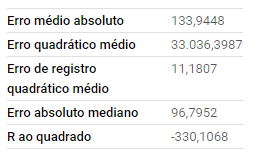

dataset sem nulos

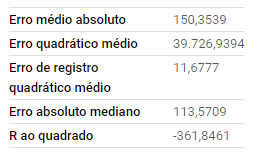


Como os modelos com todos os diagnosticos, procedimentos e items para cada paciente não estavam a dar bons resultados resolvemos fazer 2 datasets novos contendo apenas 3 e 5 valores diferentes para os diagnosticos, procedimentos e items

In [ ]:
query="""
select Distinct(SUBJECT_ID) from CDLE.patient_codes_diag where CODE_DIAG ="4019" or CODE_DIAG="41401" or CODE_DIAG="42731"

"""

df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID
0,52247
1,20502
2,25144
3,69433
4,2187
5,2346
6,16460
7,66597
8,5670
9,6288


Identificação dos diagnosticos com mais pacientes associados

In [ ]:
query="""

SELECT
  d.CODE_DIAG,
  COUNT(Distinct(p.HADM_ID)) AS Num_Pacientes
FROM
  `cdle-415809.CDLE.Data` AS p
JOIN
  `cdle-415809.CDLE.patient_codes_diag` AS d
ON
  p.SUBJECT_ID = cast(d.SUBJECT_ID as STRING)
GROUP BY
  d.CODE_DIAG
ORDER BY
  Num_Pacientes DESC
LIMIT 5;
"""

df = bpd.read_gbq(query,use_cache=False)
df

,CODE_DIAG,Num_Pacientes
0,41401,14829
1,5849,13117
2,4019,23778
3,42731,14435
4,4280,15600


itens mais utilizados pelos pacientes com pelo menos 1 dos 3 e 5 diagnosticos mais frequentes

In [ ]:
query="""

WITH DiagnosticoPacientes AS (
  SELECT
    p.ITEMID,
    p.SUBJECT_ID
  FROM
    `cdle-415809.CDLE.Data` AS p
  JOIN
    `cdle-415809.CDLE.patient_codes_diag` AS d
  ON
    p.SUBJECT_ID = CAST(d.SUBJECT_ID AS STRING)
  WHERE
    d.CODE_DIAG IN ('4019', '41401', '4280')
),
ItemCount AS (
  SELECT
    ITEMID,
    COUNT(DISTINCT SUBJECT_ID) AS Num_Pacientes
  FROM
    DiagnosticoPacientes
  GROUP BY
    ITEMID
  ORDER BY
    Num_Pacientes DESC
  LIMIT 3
)
SELECT
  ITEMID,
  Num_Pacientes AS Total_Num_Pacientes
FROM
  ItemCount;


"""

df = bpd.read_gbq(query,use_cache=False)
df

,ITEMID,Total_Num_Pacientes
0,919,14980
1,212,14788
2,161,14780


In [ ]:
query="""

WITH DiagnosticoPacientes AS (
  SELECT
    p.ITEMID,
    p.SUBJECT_ID
  FROM
    `cdle-415809.CDLE.Data` AS p
  JOIN
    `cdle-415809.CDLE.patient_codes_diag` AS d
  ON
    p.SUBJECT_ID = CAST(d.SUBJECT_ID AS STRING)
  WHERE
    d.CODE_DIAG IN ('4019', '41401', '4280','42731', '5849')
),
ItemCount AS (
  SELECT
    ITEMID,
    COUNT(DISTINCT SUBJECT_ID) AS Num_Pacientes
  FROM
    DiagnosticoPacientes
  GROUP BY
    ITEMID
  ORDER BY
    Num_Pacientes DESC
  LIMIT 5
)
SELECT
  ITEMID,
  Num_Pacientes AS Total_Num_Pacientes
FROM
  ItemCount;


"""

df = bpd.read_gbq(query,use_cache=False)
df

,ITEMID,Total_Num_Pacientes
0,432,16567
1,161,16573
2,919,16818
3,212,16582
4,829,16572


In [ ]:
query="""

select * from CDLE.Itens where ITEMID in (919, 161,212,432,829)


"""

df = bpd.read_gbq(query,use_cache=False)
df

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
0,748,829,Potassium (3.5-5.3),<NA>,carevue,chartevents,Chemistry,<NA>,<NA>,<NA>
1,1152,919,Service,<NA>,carevue,chartevents,<NA>,<NA>,<NA>,<NA>
2,399,432,Level of Conscious,<NA>,carevue,chartevents,<NA>,<NA>,<NA>,<NA>
3,213,212,Heart Rhythm,<NA>,carevue,chartevents,<NA>,<NA>,<NA>,<NA>
4,162,161,Ectopy Type,<NA>,carevue,chartevents,<NA>,<NA>,<NA>,<NA>


Criação da tabela com os 3 diagnosticos e 3 items mais frequentes

In [ ]:
query="""
CREATE OR REPLACE TABLE `cdle-415809.CDLE.result_tables` AS
WITH Diagnoses AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(d.ICD9_CODE AS STRING), ',') AS DIAGNOSES
  FROM
    `cdle-415809.CDLE.Data` AS a
  JOIN
    `cdle-415809.CDLE.coddiagnos` AS d
  ON
    a.HADM_ID = CAST(d.HADM_ID AS STRING)
  WHERE
    d.ICD9_CODE IN ('4019', '41401', '4280')
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
),

Items AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG( CAST(a.ITEMID AS STRING), ',') AS ITEMS,
    STRING_AGG( CAST(a.VALUE AS STRING), ',') AS VALUES
  FROM
    `cdle-415809.CDLE.Data` AS a
  WHERE
    CAST(a.ITEMID AS STRING) IN ('919', '161', '212')
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
)

SELECT
  d.SUBJECT_ID,
  d.HADM_ID,
  d.DIAGNOSES,
  i.ITEMS,
  i.VALUES
FROM
  Diagnoses d
LEFT JOIN
  Items i
ON
  CAST(d.HADM_ID AS STRING) = CAST(i.HADM_ID AS STRING);


"""

df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,DIAGNOSES,ITEMS,VALUES
0,5606,121228,"41401,4019,4280","161,161,212,212,161,212,212,161,212,161,212,21...","PVC's,PVC's,Atrial Fib,Atrial Fib,PVC's,Atrial..."
1,16423,186792,4280,"161,212,161,161,161,161,212,161,212,212,212,91...","None,Sinus Tachy,None,None,None,None,Sinus Tac..."
2,6234,158177,4019,"161,161,161,161,212,161,161,161,212,161,212,21...","None,None,None,None,Normal Sinus,None,None,Non..."
3,73832,166993,4019,<NA>,<NA>
4,21990,146046,4280,<NA>,<NA>
5,9736,130626,4019,"161,212,161,161,161,212,212,161,161,212,212,21...","None,Atrial Flutter,None,None,PVC's,Atrial Flu..."
6,495,186199,4280,"212,161,212,212,161,212,161,212,161,161,212,21...","Normal Sinus,None,Normal Sinus,Normal Sinus,No..."
7,75938,183122,4019,<NA>,<NA>
8,91136,172178,4019,<NA>,<NA>
9,1593,126902,4019,"161,161,212,161,212,161,212,161,212,212,212,21...","None,None,Normal Sinus,None,Normal Sinus,None,..."


Criação de uma tabela semelhante mas com os 5 diagnosticos e items

In [ ]:
query="""
CREATE OR REPLACE TABLE `cdle-415809.CDLE.result_tables2` AS
WITH Diagnoses AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(d.ICD9_CODE AS STRING), ',') AS DIAGNOSES
  FROM
    `cdle-415809.CDLE.Data` AS a
  JOIN
    `cdle-415809.CDLE.coddiagnos` AS d
  ON
    a.HADM_ID = CAST(d.HADM_ID AS STRING)
  WHERE
    d.ICD9_CODE IN ('4019', '41401', '4280','42731', '5849')
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
),

Items AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG( CAST(a.ITEMID AS STRING), ',') AS ITEMS,
    STRING_AGG( CAST(a.VALUE AS STRING), ',') AS VALUES
  FROM
    `cdle-415809.CDLE.Data` AS a
  WHERE
    CAST(a.ITEMID AS STRING) IN ('919', '161', '212','432','829')
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
)

SELECT
  d.SUBJECT_ID,
  d.HADM_ID,
  d.DIAGNOSES,
  i.ITEMS,
  i.VALUES
FROM
  Diagnoses d
LEFT JOIN
  Items i
ON
  CAST(d.HADM_ID AS STRING) = CAST(i.HADM_ID AS STRING);


"""

df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,DIAGNOSES,ITEMS,VALUES
0,27619,187945,4019,"829,919,829","4.1,TSU,4.1"
1,98281,117684,"4019,41401",<NA>,<NA>
2,1639,176027,"41401,4019","161,161,432,432,212,212,212,161,432,432,829,16...","None,None,Confused,Dozing Intermit,Sinus Tachy..."
3,21990,146046,4280,<NA>,<NA>
4,74002,155504,"42731,4280",<NA>,<NA>
5,10612,112958,"4280,5849","212,212,212,212,161,212,212,161,212,161,161,16...","Sinus Brady,2nd AVB/Mobitz I,2nd AVB/Mobitz I,..."
6,60733,143438,"42731,41401",<NA>,<NA>
7,75938,183122,4019,<NA>,<NA>
8,91136,172178,4019,<NA>,<NA>
9,27970,145895,4280,"212,161,432,161,212,161,212,212,161,212,161,16...","AV Paced,None,Alert,None,AV Paced,None,AV Pace..."


Identificação dos procedimentos mais frequentes para os pacientes com os 3 e 5 diagnosticos mais frequentes

In [ ]:
query="""

WITH DiagnosticoPacientes AS (
  SELECT
    p.SUBJECT_ID,
    p.HADM_ID
  FROM
    `cdle-415809.CDLE.result_tables` AS p
  JOIN
    `cdle-415809.CDLE.patient_codes_diag` AS d
  ON
    p.SUBJECT_ID = CAST(d.SUBJECT_ID AS STRING)
  WHERE
    d.CODE_DIAG IN ('4019', '41401', '4280')
)

SELECT
  proc.CODE_PROC,
  COUNT(DISTINCT dp.HADM_ID) AS Num_Pacientes
FROM
  DiagnosticoPacientes AS dp
JOIN
  `cdle-415809.CDLE.patient_codes_proc` AS proc
ON
  dp.SUBJECT_ID = CAST(proc.SUBJECT_ID AS STRING)
GROUP BY
  proc.CODE_PROC
ORDER BY
  Num_Pacientes DESC
LIMIT 5;

"""

df = bpd.read_gbq(query,use_cache=False)
df

,CODE_PROC,Num_Pacientes
0,9671,7059
1,9604,7787
2,3961,7375
3,9904,6469
4,3893,10870


In [ ]:
query="""

WITH DiagnosticoPacientes AS (
  SELECT
    p.SUBJECT_ID,
    p.HADM_ID
  FROM
    `cdle-415809.CDLE.result_tables2` AS p
  JOIN
    `cdle-415809.CDLE.patient_codes_diag` AS d
  ON
    p.SUBJECT_ID = CAST(d.SUBJECT_ID AS STRING)
  WHERE
    d.CODE_DIAG IN ('4019', '41401', '4280','42731', '5849')
)

SELECT
  proc.CODE_PROC,
  COUNT(DISTINCT dp.HADM_ID) AS Num_Pacientes
FROM
  DiagnosticoPacientes AS dp
JOIN
  `cdle-415809.CDLE.patient_codes_proc` AS proc
ON
  dp.SUBJECT_ID = CAST(proc.SUBJECT_ID AS STRING)
GROUP BY
  proc.CODE_PROC
ORDER BY
  Num_Pacientes DESC
LIMIT 5;

"""

df = bpd.read_gbq(query,use_cache=False)
df


,CODE_PROC,Num_Pacientes
0,3893,13247
1,9671,8285
2,9604,9377
3,3961,7796
4,966,7887


Criação das tabelas mas agr com os 3 e 5 diagnosticos, procedimentos e items mais frequentes

In [ ]:
query="""
CREATE OR REPLACE TABLE `cdle-415809.CDLE.result_tables` AS
WITH Diagnoses AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(d.ICD9_CODE AS STRING), ',') AS DIAGNOSES
  FROM
    `cdle-415809.CDLE.Data` AS a
  JOIN
    `cdle-415809.CDLE.coddiagnos` AS d
  ON
    a.HADM_ID = CAST(d.HADM_ID AS STRING)
  WHERE
    d.ICD9_CODE IN ('4019', '41401', '4280')
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
),

Items AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG( CAST(a.ITEMID AS STRING), ',') AS ITEMS,
    STRING_AGG( CAST(a.VALUE AS STRING), ',') AS VALUES
  FROM
    `cdle-415809.CDLE.Data` AS a
  WHERE
    CAST(a.ITEMID AS STRING) IN ('919', '161', '212')
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
),

Procedures AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(p.ICD9_CODE AS STRING), ',') AS PROCEDURES
  FROM
    `cdle-415809.CDLE.Data` AS a
  JOIN
    `cdle-415809.CDLE.codproce` AS p
  ON
    a.HADM_ID = CAST(p.HADM_ID AS STRING)
  WHERE
    CAST(p.ICD9_CODE AS STRING) IN ('3893', '9604', '3961')
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
)

SELECT
  d.SUBJECT_ID,
  d.HADM_ID,
  d.DIAGNOSES,
  i.ITEMS,
  i.VALUES,
  p.PROCEDURES
FROM
  Diagnoses d
LEFT JOIN
  Items i
ON
  CAST(d.HADM_ID AS STRING) = CAST(i.HADM_ID AS STRING)
LEFT JOIN
  Procedures p
ON
  CAST(d.HADM_ID AS STRING) = CAST(p.HADM_ID AS STRING);


"""


df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,DIAGNOSES,ITEMS,VALUES,PROCEDURES
0,27665,186634,4280,"161,161,212,161,212,161,161,161,161,161,212,21...","None,None,Normal Sinus,None,Normal Sinus,None,...",3893
1,44539,105487,4019,<NA>,<NA>,<NA>
2,22639,140256,"4019,41401","212,212,212,212,212,161,161,161,212,212,161,16...","Normal Sinus,Normal Sinus,Normal Sinus,Normal ...",3961
3,64655,116224,4019,<NA>,<NA>,9604
4,17778,147225,4280,"161,212,212,212,212,161,161,212,212,161,212,16...","PVC's,Normal Sinus,Normal Sinus,Normal Sinus,N...","3893,9604"
5,902,137798,4280,"161,212,161,212,212,161,212,212,212,212,212,16...","None,Sinus Tachy,None,Sinus Tachy,Normal Sinus...",3893
6,41724,131406,4019,<NA>,<NA>,<NA>
7,91563,155738,4280,<NA>,<NA>,<NA>
8,29035,124081,4019,<NA>,<NA>,<NA>
9,11449,126033,"41401,4280","212,161,161,161,161,212,161,161,161,212,212,21...","Normal Sinus,None,None,None,None,Normal Sinus,...",<NA>


In [ ]:
query="""
CREATE OR REPLACE TABLE `cdle-415809.CDLE.result_tables2` AS
WITH Diagnoses AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(d.ICD9_CODE AS STRING), ',') AS DIAGNOSES
  FROM
    `cdle-415809.CDLE.Data` AS a
  JOIN
    `cdle-415809.CDLE.coddiagnos` AS d
  ON
    a.HADM_ID = CAST(d.HADM_ID AS STRING)
  WHERE
    d.ICD9_CODE IN ('4019', '41401', '4280','42731', '5849')
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
),

Items AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG( CAST(a.ITEMID AS STRING), ',') AS ITEMS,
    STRING_AGG( CAST(a.VALUE AS STRING), ',') AS VALUES
  FROM
    `cdle-415809.CDLE.Data` AS a
  WHERE
    CAST(a.ITEMID AS STRING) IN ('919', '161', '212','432','829')
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
),

Procedures AS (
  SELECT
    a.SUBJECT_ID,
    a.HADM_ID,
    STRING_AGG(DISTINCT CAST(p.ICD9_CODE AS STRING), ',') AS PROCEDURES
  FROM
    `cdle-415809.CDLE.Data` AS a
  JOIN
    `cdle-415809.CDLE.codproce` AS p
  ON
    a.HADM_ID = CAST(p.HADM_ID AS STRING)
  WHERE
    CAST(p.ICD9_CODE AS STRING) IN ('3893', '9604', '3961','9671','966')
  GROUP BY
    a.SUBJECT_ID, a.HADM_ID
)

SELECT
  d.SUBJECT_ID,
  d.HADM_ID,
  d.DIAGNOSES,
  i.ITEMS,
  i.VALUES,
  p.PROCEDURES
FROM
  Diagnoses d
LEFT JOIN
  Items i
ON
  CAST(d.HADM_ID AS STRING) = CAST(i.HADM_ID AS STRING)
LEFT JOIN
  Procedures p
ON
  CAST(d.HADM_ID AS STRING) = CAST(p.HADM_ID AS STRING);


"""


df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,DIAGNOSES,ITEMS,VALUES,PROCEDURES
0,9064,165690,"42731,4280","161,212,161,161,161,919,212,212,212,212,212,21...","None,Atrial Fib,None,None,PVC's,VSU,Atrial Fib...",3893
1,14977,188511,4280,"432,161,161,212,829,212,161,161,212,161,212,21...","Dozing Intermit,None,None,Normal Sinus,4.6,Nor...",3961
2,30662,105899,"42731,41401","212,161,212,212,212,161,212,212,212,161,161,16...","Normal Sinus,PAC's,Normal Sinus,Normal Sinus,A...",3961
3,2879,111390,42731,"212,919,829,161,212,212,212,432,829,212,161,16...","Normal Sinus,CSU,5.1,None,Normal Sinus,Normal ...",3961
4,32367,116509,"4019,41401","161,212,432,432,212,432,161,161,212,432,212,21...","PAC's,Normal Sinus,Alert,Arouse to Voice,Norma...",<NA>
5,41724,131406,4019,<NA>,<NA>,<NA>
6,29035,124081,4019,<NA>,<NA>,<NA>
7,15157,156695,"41401,4280,42731,4019","161,161,212,161,161,432,212,161,212,432,432,16...","PVC's,PVC's,Normal Sinus,None,None,Alert,Norma...",<NA>
8,14060,171645,"5849,4019","161,829,432,432,432,212,432,212,161,161,432,21...","None,3.4,Arouse to Stimul,Paralytic Med,Sedate...","3893,9604"
9,9072,129562,4019,"212,432,161,161,161,432,161,161,212,161,212,16...","Normal Sinus,Arouse to Stimul,None,None,None,A...",<NA>


Criação das tabelas para serem utilizadas pelos modelos

In [ ]:
query = """

CREATE OR REPLACE TABLE cdle-415809.CDLE.Model2 AS
SELECT
  SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES
FROM
  cdle-415809.CDLE.result_tables

"""
df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES
0,44539,105487,4019,<NA>,<NA>,<NA>
1,41724,131406,4019,<NA>,<NA>,<NA>
2,91563,155738,4280,<NA>,<NA>,<NA>
3,46960,153896,4019,"3893,3961",<NA>,<NA>
4,29035,124081,4019,<NA>,<NA>,<NA>
5,51226,105929,"41401,4280",<NA>,<NA>,<NA>
6,6378,122006,4280,3893,"212,161,161,161,161,161,212,212,212,161,161,16...","Normal Sinus,None,None,None,None,None,Normal S..."
7,17149,142072,"4280,41401",<NA>,"161,212,212,212,212,161,212,161,212,161,212,21...","PVC's,Normal Sinus,Normal Sinus,Normal Sinus,S..."
8,84842,175601,4019,9604,<NA>,<NA>
9,32225,139616,4019,<NA>,"161,919,161,161,161,161,212,212,161,161,212,21...","None,CME,None,None,None,None,V Paced,V Paced,N..."


In [ ]:
query = """

CREATE OR REPLACE TABLE cdle-415809.CDLE.Model3 AS
SELECT
  SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES
FROM
  cdle-415809.CDLE.result_tables2

"""
df = bpd.read_gbq(query,use_cache=False)
df

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES
0,10207,118574,"5849,4019","966,9671","161,432,432,161,161,432,212,212,212,212,212,21...","None,Lethargic,Lethargic,None,None,Lethargic,N..."
1,2332,134935,"5849,42731","3893,9604","432,161,161,161,161,212,212,212,161,161,161,16...","Arouse to Pain,None,PAC's,None,None,Atrial Fib..."
2,13123,135204,"42731,5849,4280","9604,9671",<NA>,<NA>
3,29019,183832,4019,<NA>,"161,212,212,212,161,161,161,161,212,161,432,16...","None,Sinus Brady,Sinus Brady,Sinus Brady,None,..."
4,41724,131406,4019,<NA>,<NA>,<NA>
5,24258,103498,41401,<NA>,"161,432,212,432,161,161,212,212,212,212,161,21...","None,Alert,Normal Sinus,Alert,PVC's,PVC's,Norm..."
6,29035,124081,4019,<NA>,<NA>,<NA>
7,56930,109803,"41401,4019",3961,<NA>,<NA>
8,5331,142049,"41401,42731,4019",3961,"161,212,432,212,161,432,829,161,212,212,212,82...","PAC's,Atrial Fib,Alert,Atrial Fib,None,Sleepin..."
9,26042,125867,5849,<NA>,"212,161,161,161,432,161,919,161,161,212,161,21...","Normal Sinus,None,None,None,Confused,None,MED,..."


In [ ]:
query="""

ALTER TABLE cdle-415809.CDLE.Model2 ADD COLUMN GENDER STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model2 ADD COLUMN AGE INT64
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model2 ADD COLUMN ETHNICITY STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model2 ADD COLUMN ADMISSION_TYPE STRING
"""
df = bpd.read_gbq(query,use_cache=False)


query="""

ALTER TABLE cdle-415809.CDLE.Model2 ADD COLUMN ADMISSION_LOCATION STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model2 ADD COLUMN LOS FLOAT64
"""
df = bpd.read_gbq(query,use_cache=False)

In [ ]:
query="""

ALTER TABLE cdle-415809.CDLE.Model3 ADD COLUMN GENDER STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model3 ADD COLUMN AGE INT64
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model3 ADD COLUMN ETHNICITY STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model3 ADD COLUMN ADMISSION_TYPE STRING
"""
df = bpd.read_gbq(query,use_cache=False)


query="""

ALTER TABLE cdle-415809.CDLE.Model3 ADD COLUMN ADMISSION_LOCATION STRING
"""
df = bpd.read_gbq(query,use_cache=False)

query="""

ALTER TABLE cdle-415809.CDLE.Model3 ADD COLUMN LOS FLOAT64
"""
df = bpd.read_gbq(query,use_cache=False)

In [ ]:
query ="""

UPDATE cdle-415809.CDLE.Model2 AS t1
SET
    t1.GENDER = t2.GENDER,
    t1.AGE = t2.AGEs,
    t1.ETHNICITY = t2.ETHNICITY,
    t1.ADMISSION_TYPE = t2.ADMISSION_TYPE,
    t1.ADMISSION_LOCATION = t2.ADML,
    t1.LOS = t2.LOS
FROM (
    SELECT
        t2.SUBJECT_ID,
        t2.HADM_ID,
        t2.GENDER,
        t2.AGEs,
        t2.ETHNICITY,
        t2.ADMISSION_TYPE,
        t2.ADML,
        t2.LOS,
        ROW_NUMBER() OVER (PARTITION BY t2.SUBJECT_ID, t2.HADM_ID ORDER BY t2.HADM_ID) AS row_num
    FROM
        cdle-415809.CDLE.Data AS t2
) AS t2
WHERE
    t1.SUBJECT_ID = CAST(t2.SUBJECT_ID AS STRING)
    AND t1.HADM_ID = CAST(t2.HADM_ID AS STRING)
    AND t2.row_num = 1;


"""
df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES,GENDER,AGE,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,LOS
0,24761,175628,41401,3961,"212,161,212,212,212,161,212,161,161,161,212,21...","Sinus Brady,PVC's,Normal Sinus,Normal Sinus,No...",M,49,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,6.575
1,19286,195185,"4019,41401",3961,"161,212,161,212,161,212,161,212,161,212,161,16...","None,Normal Sinus,None,Sinus Tachy,None,Normal...",M,59,UNKNOWN/NOT SPECIFIED,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.6317
2,50636,194847,"41401,4019,4280",3893,<NA>,<NA>,F,72,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,6.6116
3,96838,126405,4019,<NA>,<NA>,<NA>,M,71,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,1.5677
4,50991,178779,"4019,4280",3893,<NA>,<NA>,M,77,WHITE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,0.7718
5,70226,114222,4019,9604,<NA>,<NA>,F,79,BLACK/AFRICAN AMERICAN,EMERGENCY,CLINIC REFERRAL/PREMATURE,12.322
6,58700,109471,4019,<NA>,<NA>,<NA>,M,56,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,2.4195
7,9673,163732,4019,<NA>,"212,212,161,212,161,212,161,161,161,161,212,16...","Sinus Brady,Normal Sinus,None,Sinus Brady,None...",M,67,WHITE,ELECTIVE,PHYS REFERRAL/NORMAL DELI,2.2977
8,83310,166410,4019,"9604,3893",<NA>,<NA>,M,56,BLACK/AFRICAN AMERICAN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,11.9648
9,97206,110487,"41401,4280",<NA>,<NA>,<NA>,M,90,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,1.6136


In [ ]:
query ="""

UPDATE cdle-415809.CDLE.Model3 AS t1
SET
    t1.GENDER = t2.GENDER,
    t1.AGE = t2.AGEs,
    t1.ETHNICITY = t2.ETHNICITY,
    t1.ADMISSION_TYPE = t2.ADMISSION_TYPE,
    t1.ADMISSION_LOCATION = t2.ADML,
    t1.LOS = t2.LOS
FROM (
    SELECT
        t2.SUBJECT_ID,
        t2.HADM_ID,
        t2.GENDER,
        t2.AGEs,
        t2.ETHNICITY,
        t2.ADMISSION_TYPE,
        t2.ADML,
        t2.LOS,
        ROW_NUMBER() OVER (PARTITION BY t2.SUBJECT_ID, t2.HADM_ID ORDER BY t2.HADM_ID) AS row_num
    FROM
        cdle-415809.CDLE.Data AS t2
) AS t2
WHERE
    t1.SUBJECT_ID = CAST(t2.SUBJECT_ID AS STRING)
    AND t1.HADM_ID = CAST(t2.HADM_ID AS STRING)
    AND t2.row_num = 1;


"""
df = bpd.read_gbq(query,use_cache=False)

df

,SUBJECT_ID,HADM_ID,DIAGNOSES,PROCEDURES,ITEMS,VALUES,GENDER,AGE,ETHNICITY,ADMISSION_TYPE,ADMISSION_LOCATION,LOS
0,9412,114483,"4019,5849,4280",<NA>,"212,161,212,212,161,919,212,212,161,432,161,21...","Sinus Brady,PVC's,Normal Sinus,Normal Sinus,No...",M,65,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,2.1052
1,40644,118853,"5849,41401","3893,9671,9604",<NA>,<NA>,F,69,WHITE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.6443
2,96838,126405,4019,<NA>,<NA>,<NA>,M,71,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,1.5677
3,8512,162973,5849,<NA>,"161,212,432,161,161,161,212,161,161,161,161,16...","None,Normal Sinus,Alert,None,None,None,Normal ...",M,60,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,1.893
4,23783,138311,4019,<NA>,"161,212,432,161,161,212,212,161,432,212,161,21...","None,Normal Sinus,Alert,None,None,Sinus Brady,...",M,72,WHITE,EMERGENCY,CLINIC REFERRAL/PREMATURE,0.566
5,28078,122847,4019,9671,"161,212,212,919,432,161,212","None,Normal Sinus,Normal Sinus,NSU,Unresponsiv...",F,80,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,0.2326
6,58700,109471,4019,<NA>,<NA>,<NA>,M,56,WHITE,EMERGENCY,EMERGENCY ROOM ADMIT,2.4195
7,32317,128577,"41401,42731,4019","3961,3893","432,212,161,161,161,829,212,161,212,161,161,21...","Paralytic Med,Normal Sinus,None,None,None,3.7,...",F,76,WHITE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2.3491
8,791,170658,"4019,41401",3961,"161,212,161,212,161,212,161,212,161,161,212,21...","None,Sinus Tachy,None,Normal Sinus,None,Sinus ...",F,70,UNKNOWN/NOT SPECIFIED,URGENT,TRANSFER FROM HOSP/EXTRAM,1.1431
9,24924,162178,"41401,4280,4019","9604,9671","161,161,212,212,161,161,161,161,161,212,212,43...","None,None,Normal Sinus,Normal Sinus,None,None,...",F,81,WHITE,URGENT,TRANSFER FROM HOSP/EXTRAM,3.6521


Após preparadas as tabelas com os dados iremos proceder à preparação e a uma ultima alteração aos dados para depois serem implementados e testados os modelos